# UFC Fight Analysis <a class='tocSkip'>

**By: [Courtney Ferguson Lee](linkedin.com/in/courtneyfergusonlee)**

<img src='https://raw.githubusercontent.com/spacecadet84/ufc_fight_analysis/master/images/ufc_fighter_red_wordcloud_small.png'>

# Introduction

What does it mean to be the best fighter in the world? Is it the person with the best kick? The best punch? Or is it something else? This project seeks to determine which factors are the best predictors of success in the UFC. It explores every fight since the organization's inception in the hopes of gaining insight into what separates winners and losers. We start with an exploratory visual analysis of all variables before cleaning the data and building our machine learning models. Currently, the algorithms are able to predict the outcome with approximately ~~55-60%~~ ~~57-66%~~ 85-88% accuracy. Our goal is to improve that over time through iteration.

# Background

The Ultimate Fighting Championship (UFC) is a mixed martial arts fighting organization based out of Las Vegas, Nevada. Founded in 1992, it's original goal was to pit fighters from around the world against each other to see which fighting style was the best. In the beginning, there were no rules and there were no weight classes. Eye gouges, groin strikes, headbutts and biting were all legal. Fighters weighing 160 lbs would get tossed in against 400 lbs behemoths. This type of no holds bar contest had never been attempted before and it quickly gained notoriety for its brutality.

It also gave rise to a new way of thinking about fighting. When kung-fu masters, boxers, kickboxers, and karate experts all met for the first time, no one could have predicted the outcome. Most people expected the larger, more gruesome-looking fighters to win. To everyone's shock, it was an unassuming 178 pound man named Royce Gracie who would go on to win the first contest. What was even stranger was that no one could explain how he won the first time (or the second or the third). He didn't pummel his opponent into submission as expected, but instead locked him up using wrestling moves most people hadn't seen before. This was the world's introduction to Brazillian Jiu Jitsu (BJJ).

After Royce went on to win several UFC contests, people began to realize he was not just getting lucky. Fighters started studying this martial art so they could start applying these techniques in their matches or at the very least prevent themselves from being submitted by Royce. Then, they started adding techniques from other fighting styles so that they, too could become the best in the world. This was the beginning of mixed martial arts or MMA. It started out with a multitude of different styles, but a handful started to show up repeatedly: BJJ, wrestling, boxing and kickboxing. Over time, fighters' skill in these 4 areas evolved to where no one art was able to completely dominate the others. 

Now, the UFC is watched by millions worldwide and its support continues to grow. The rules were changed to protect the safety of the fighters. You can no longer gouge your opponent's eyes or pull hair or bite. All fighters are now required to wear standard MMA gloves and shoes are no longer allowed in the octagon. There are now weight classes that range from 115 lbs all the way up to 265. A lot has changed in the UFC and this project seeks to determine which components matter most in a match.

<img src='https://cdn.rawgit.com/spacecadet84/ufc_fight_analysis/bcb906d3/images/ufc_red_wordcloud.pnghttps://raw.githubusercontent.com/spacecadet84/ufc_fight_analysis/master/images/ufc_red_wordcloud_small.png'>

# Data

The data was scraped from www.fightmetrics.com with Beautiful Soup in two stages. The first script compiled a list of event urls and wrote them to a CSV. The second script crawled through those urls and extracted all available fight data into a pandas dataframe. There are 31 features and 8624 records.

During our exploration, we'll examine the data from several perspectives. We'll put it under a microscope through univariate analysis, get a bird's eye view using a correlation matrix and view it from ringside through multivariate analysis.

In [14]:
# Imports and Helper Functions
# data Analysis
import pandas as pd
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 75
from IPython.display import display
import seaborn as sns
import numpy as np
from pprint import pprint
from scipy.stats import norm
color = sns.color_palette()
import random

# Web Scraping
import json
import codecs
import csv
import datetime
from bs4 import BeautifulSoup
import requests
import cStringIO
import pprint

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
from PIL import Image
from wordcloud import WordCloud

#SciKit Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

from subprocess import check_output
print check_output(["ls", "data"]).decode("utf8")
fight_data = pd.read_csv("data/fights_v5.csv")
fight_df = pd.DataFrame(fight_data)
# Any results you write to the current directory are saved as output.

# Noteboook Functionality
#from IPython.core.interactiveshell import InteractiveShell # All statements are printed to output
#InteractiveShell.ast_node_interactivity = "all"

chunks
fight_urls.csv
fight_urls_backup.csv
fights_v1.csv
fights_v2.csv
fights_v3.csv
fights_v4.csv
fights_v5.csv



In [15]:
fight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8624 entries, 0 to 8623
Data columns (total 31 columns):
body                 8624 non-null int64
body_attempts        8624 non-null int64
clinch               8624 non-null int64
clinch_attempts      8624 non-null int64
date                 8624 non-null object
distance             8624 non-null int64
distance_attempts    8624 non-null int64
fight_id             8624 non-null int64
ground               8624 non-null int64
ground_attempts      8624 non-null int64
head                 8624 non-null int64
head_attempts        8624 non-null int64
kd                   8624 non-null int64
leg                  8624 non-null int64
leg_attempts         8624 non-null int64
location             8624 non-null object
method               8624 non-null object
name                 8624 non-null object
pass                 8624 non-null int64
referee              8590 non-null object
reversals            8624 non-null int64
round                8624 n

From this, we can see that we have a total of 32 Columns and one dependent variable. The columns themselves have 7 object types (First Name, Last Name, Method, Referee, Date, Location and Title), and 25 Float types. This however does not give us a complete picture of the data, so we'll use a few other pandas functions to get a better glimpse. 

In [16]:
fight_df.skew()

body                 2.347035
body_attempts        2.236733
clinch               2.986340
clinch_attempts      2.798223
distance             2.178721
distance_attempts    1.774613
fight_id             0.002737
ground               3.274183
ground_attempts      3.102702
head                 1.880800
head_attempts        1.605491
kd                   2.611867
leg                  2.681679
leg_attempts         2.685116
pass                 2.941130
reversals            3.667900
round                0.178339
sig_attempts         1.453970
sig_strikes          1.585119
strike_attempts      1.015091
strikes              1.373212
sub_attempts         2.841962
takedowns            2.407126
td_attempts          1.915120
dtype: float64

In [17]:
fight_df.describe(include=['O'])

,date,location,method,name,referee,title,win/loss
count,8624,8624,8624,8624,8590,8624,8624
unique,407,136,8,1684,155,411,4
top,"November 19, 2016","Las Vegas, Nevada, USA",Decision,Michael Bisping,Herb Dean,UFC Fight Night: Belfort vs Henderson,W
freq,50,2226,3732,27,1292,48,4237


## Observations

Most of the variables have low means and large maximum values, which means they are probably highly skewed to the right. It might make sense to apply a log transform to some of the distributions when conducting the univariate analysis.

In the categorical overview, we can see that Herb Dean is truly a prolific ref! Who knew that he officiated over 1300 UFC fights? I would've guessed John McCarthy was the leader in that respect, but Herb Dean has definitely paid his dues. Right now the fighter names are split into first and last columns so there doesn't seem to be a pattern, but later in the analysis I pull them back together to make them more readable. You'll never guess who's the most prolific UFC fighter. Spoler alert: It's Jim Miller. I bet he wasn't even on your radar.

## Missing Data

Nothing to see here. The only column that has any missing data is the referee column and it's only 4%. Let's keep it moving

In [18]:
percent_missing = (fight_df.isnull().sum()/fight_df.isnull().count()).sort_values()
percent_missing

body                 0.000000
td_attempts          0.000000
takedowns            0.000000
sub_attempts         0.000000
strikes              0.000000
strike_attempts      0.000000
sig_strikes          0.000000
sig_attempts         0.000000
round                0.000000
reversals            0.000000
pass                 0.000000
name                 0.000000
method               0.000000
title                0.000000
location             0.000000
leg                  0.000000
kd                   0.000000
head_attempts        0.000000
head                 0.000000
ground_attempts      0.000000
ground               0.000000
fight_id             0.000000
distance_attempts    0.000000
distance             0.000000
date                 0.000000
clinch_attempts      0.000000
clinch               0.000000
body_attempts        0.000000
leg_attempts         0.000000
win/loss             0.000000
referee              0.003942
dtype: float64

# Minor Aesthetics

Before diving deeper into the dataset, let's take a moment to fix a few minor details.

## Rearranging Columns

It bugs me slightly that each fighter's name is buried in the middle of the dataframe. The analysis will be a lot simpler if that information was the first thing we saw in each row. Let's take care of that and move the win/loss column to the front as well.

In [19]:
# Creates a copy of the dataframe for testing
fight_df = pd.DataFrame(fight_data.copy())

# Rearranges the columns so the name, date, fight_id, win/loss and method appear first
cols = fight_df.columns.tolist()
cols = cols[17:18] + cols[4:5] + cols[7:8] + cols[-1:] + cols[16:17] + cols[:4] + cols[5:7] + cols[8:16] + cols[18:-1]

fight_df = fight_df[cols]

# Sets the index as the fight_id
# fight_df.set_index('fight_id', inplace=True)

# Change kd to knock_down for readability
fight_df.rename(columns={'kd': 'knockdowns'}, inplace=True)

In [20]:
fight_df.tail()

,name,date,fight_id,win/loss,method,body,body_attempts,clinch,clinch_attempts,distance,distance_attempts,ground,ground_attempts,head,head_attempts,knockdowns,leg,leg_attempts,location,pass,referee,reversals,round,sig_attempts,sig_strikes,strike_attempts,strikes,sub_attempts,takedowns,td_attempts,title
8619,Art Jimmerson,"November 12, 1993",4335,L,Submission,0,0,0,0,0,0,0,0,0,0,0,0,0,"Denver, Colorado, USA",0,Joao Barreto,0,1,0,0,0,0,0,0,0,UFC 1: The Beginning
8620,Kevin Rosier,"November 12, 1993",4336,W,KO/TKO,3,4,4,9,4,10,7,8,12,23,2,0,0,"Denver, Colorado, USA",0,Joao Barreto,0,1,27,15,53,38,0,0,0,UFC 1: The Beginning
8621,Zane Frazier,"November 12, 1993",4336,L,KO/TKO,3,6,10,19,0,7,2,2,7,19,0,2,3,"Denver, Colorado, USA",0,Joao Barreto,0,1,28,12,29,13,0,0,0,UFC 1: The Beginning
8622,Gerard Gordeau,"November 12, 1993",4337,W,KO/TKO,0,0,0,0,1,3,2,2,3,5,0,0,0,"Denver, Colorado, USA",0,Joao Barreto,0,1,5,3,5,3,0,0,0,UFC 1: The Beginning
8623,Teila Tuli,"November 12, 1993",4337,L,KO/TKO,0,0,0,0,0,1,0,0,0,1,0,0,0,"Denver, Colorado, USA",0,Joao Barreto,0,1,1,0,1,0,0,0,1,UFC 1: The Beginning


## Rearranging Fights in Chronological Order

Right off the bat I can see the data is organized in reverse-chronological order. Art Jimmerson fought in the first UFC event and I still remember him because he fought with one boxing glove. It was a crazy time... I'll reverse the dataframe so it's in chronological order and re-index the records. 

I'm surprised by the lack of NaN values in this dataset. Apparently, Fightmetrics is very organized! I'll have to crawl deep to see if there are any inconsistencies.

In [21]:
fight_df['fight_id'] = abs(4337 - fight_df['fight_id'])
fight_df = fight_df[::-1]
index = list(range(len(fight_df)))
fight_df.index = index
fight_df['outcome'] = 0
fight_df.loc[fight_df['win/loss'] == 'W', 'outcome'] = 1

Let's format the date column as datetime objects while we're at it.

In [22]:
fight_df.loc[:, 'date'] = pd.to_datetime(fight_df.date)
all_fights = fight_df.copy()
fight_df.head()

,name,date,fight_id,win/loss,method,body,body_attempts,clinch,clinch_attempts,distance,distance_attempts,ground,ground_attempts,head,head_attempts,knockdowns,leg,leg_attempts,location,pass,referee,reversals,round,sig_attempts,sig_strikes,strike_attempts,strikes,sub_attempts,takedowns,td_attempts,title,outcome
0,Teila Tuli,1993-11-12,0,L,KO/TKO,0,0,0,0,0,1,0,0,0,1,0,0,0,"Denver, Colorado, USA",0,Joao Barreto,0,1,1,0,1,0,0,0,1,UFC 1: The Beginning,0
1,Gerard Gordeau,1993-11-12,0,W,KO/TKO,0,0,0,0,1,3,2,2,3,5,0,0,0,"Denver, Colorado, USA",0,Joao Barreto,0,1,5,3,5,3,0,0,0,UFC 1: The Beginning,1
2,Zane Frazier,1993-11-12,1,L,KO/TKO,3,6,10,19,0,7,2,2,7,19,0,2,3,"Denver, Colorado, USA",0,Joao Barreto,0,1,28,12,29,13,0,0,0,UFC 1: The Beginning,0
3,Kevin Rosier,1993-11-12,1,W,KO/TKO,3,4,4,9,4,10,7,8,12,23,2,0,0,"Denver, Colorado, USA",0,Joao Barreto,0,1,27,15,53,38,0,0,0,UFC 1: The Beginning,1
4,Art Jimmerson,1993-11-12,2,L,Submission,0,0,0,0,0,0,0,0,0,0,0,0,0,"Denver, Colorado, USA",0,Joao Barreto,0,1,0,0,0,0,0,0,0,UFC 1: The Beginning,0


Ah, much better! The earliest fights are at the beginning of the dataset and the later fights are at the end. Now to dive into the variables.

# Variables

## Fight Metadata

To start, we'll analyze data that is not specific to individual fighters, but to UFC fights in general. We'll examine the average number of rounds per fight, method used and decision outcome. Let's dive in!

### Rounds

Finally, let's see how the rounds are distributed. A fight can end in any round, but the maximum number of rounds for each fight depends on whether it's a title fight. Title fights are 5 rounds long while non-title fights are 3 rounds long.

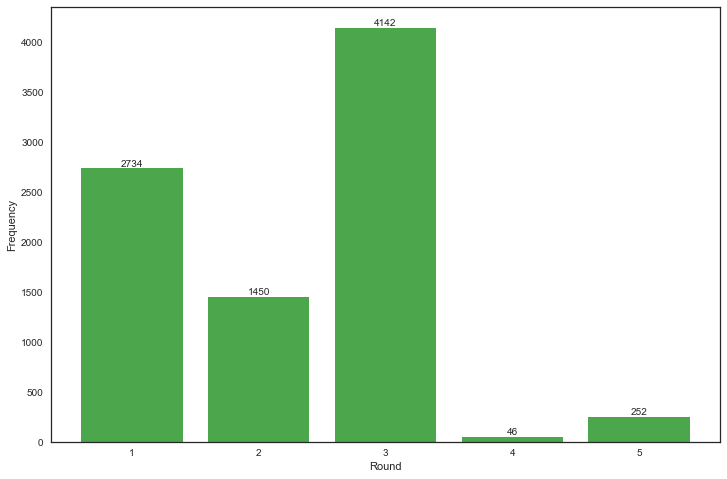

In [23]:
counts = fight_df['round'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(counts.index, counts.values, alpha=.7, color='g')
plt.xlabel('Round')
plt.ylabel('Frequency')
for x,y in zip(counts.index, counts.values):
    plt.text(x, y, y, ha='center', va='bottom')
plt.show()

Very interesting. The most frequent fight length was 3 rounds while the least frequent was 4. This tells me that most fights probably go to a decision rather than KO or submission.

### Method and Win/Loss

In [24]:
fight_df['method'].value_counts()

Decision      3732
KO/TKO        2790
Submission    1850
TKO            130
Overturned      68
Could           26
DQ              24
Other            4
Name: method, dtype: int64

The "TKO", "Could" and "Other" immedietely jump out at me as categories worth exploring. I have no idea what the "Could" or "Other" categories represent. I'm guessing the first is a typo but I'll have to do some research to see what's going on there. I'm also curious as to why they placed KO/TKO and TKO into separate groups. I'll have to research that as well to see if we can consolidate the two categories.

In [35]:
display(fight_df[fight_df.method=='Could'].tail())
display(fight_df[fight_df.method=='Other'])
display(fight_df[fight_df.method=='TKO'].tail())

,name,date,fight_id,win/loss,method,body,body_attempts,clinch,clinch_attempts,distance,distance_attempts,ground,ground_attempts,head,head_attempts,knockdowns,leg,leg_attempts,location,pass,referee,reversals,round,sig_attempts,sig_strikes,strike_attempts,strikes,sub_attempts,takedowns,td_attempts,title,outcome


After doing a little market research and totally not wasting time by watching UFC fights, it looks like the "Could" category stands for no contest, "Other" stands for draws and "TKO" stands for fights where one fighter could not continue due to injury. Each of these scenarios present different challenges. Before going further, let's change "Could" to "No Contest", "Other" to "Draw" and change TKO to "Injury".

In [28]:
fight_df.loc[fight_df.method=='Could', 'method'] = "No Contest"
fight_df.loc[fight_df.method=='TKO', "method"] = "Injury"
fight_df.loc[fight_df.method=='Other', "method"] = "Draw"

Fights that stop due to injury are usually fights in which one fighter has been beating his opponent so badly, they had to stop the fight because the opponent couldn't continue. I'll probably do some more market research later, but right now I see that as a win. The goal is to beat up the other fighter, so mission accomplished. I don't know if I'll combine that category with TKO/KO's, but it's a valid win.

No contests and draws, however are a different story. Neither one demonstrates that one side dominated the other and in many cases they are the result of luck. Because of this, they will most likely be dropped from the dataset before building any models.

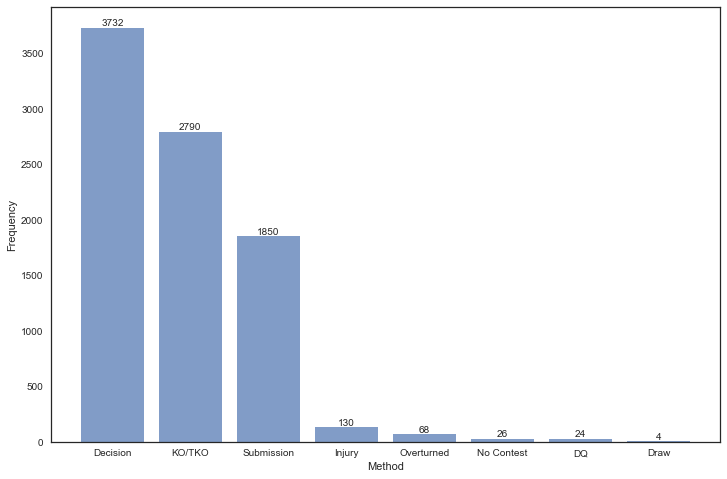

In [29]:
counts = fight_df['method'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(range(len(counts.index)), counts.values, alpha=.7)
plt.xlabel('Method')
plt.ylabel('Frequency')
plt.xticks(range(len(counts.index)), counts.index)
for x,y in zip(range(len(counts.index)), counts.values):
    plt.text(x, y, y, ha='center', va='bottom')
plt.show()

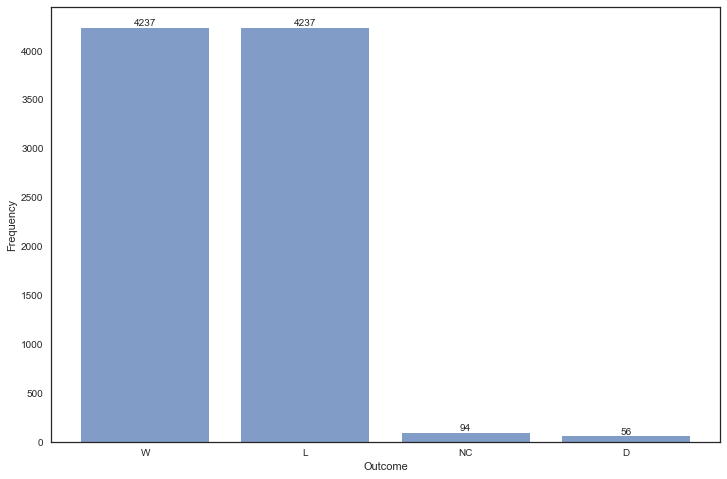

In [30]:
counts = fight_df['win/loss'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(range(len(counts.index)), counts.values, alpha=.7)
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.xticks(range(len(counts.index)), counts.index)
for x,y in zip(range(len(counts.index)), counts.values):
    plt.text(x, y, y, ha='center', va='bottom')
plt.show()

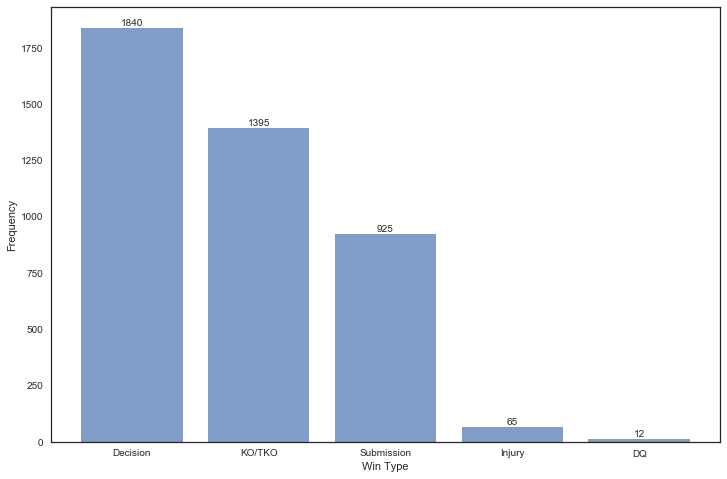

In [31]:
counts = fight_df[fight_df['win/loss']=='W'].method.value_counts()
plt.figure(figsize=(12,8))
plt.bar(range(len(counts.index)), counts.values, alpha=.7)
plt.xlabel('Win Type')
plt.ylabel('Frequency')
plt.xticks(range(len(counts.index)), counts.index)
for x,y in zip(range(len(counts.index)), counts.values):
    plt.text(x, y, y, ha='center', va='bottom')
plt.show()

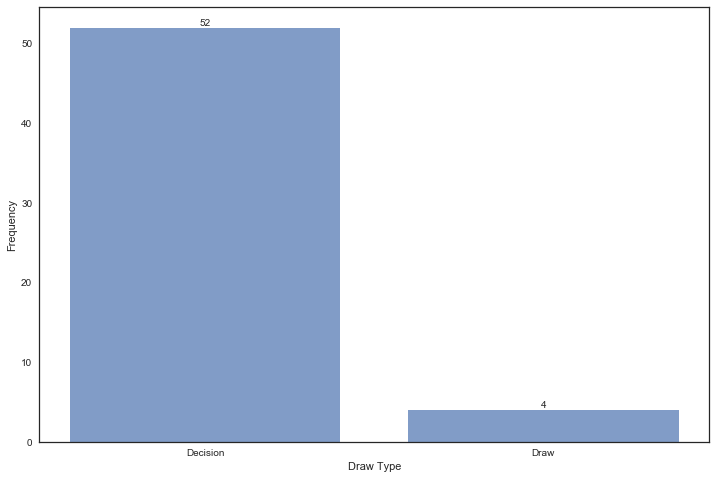

In [32]:
counts = fight_df[fight_df['win/loss']=='D'].method.value_counts()
plt.figure(figsize=(12,8))
plt.bar(range(len(counts.index)), counts.values, alpha=.7)
plt.xlabel('Draw Type')
plt.ylabel('Frequency')
plt.xticks(range(len(counts.index)), counts.index)
for x,y in zip(range(len(counts.index)), counts.values):
    plt.text(x, y, y, ha='center', va='bottom')
plt.show()

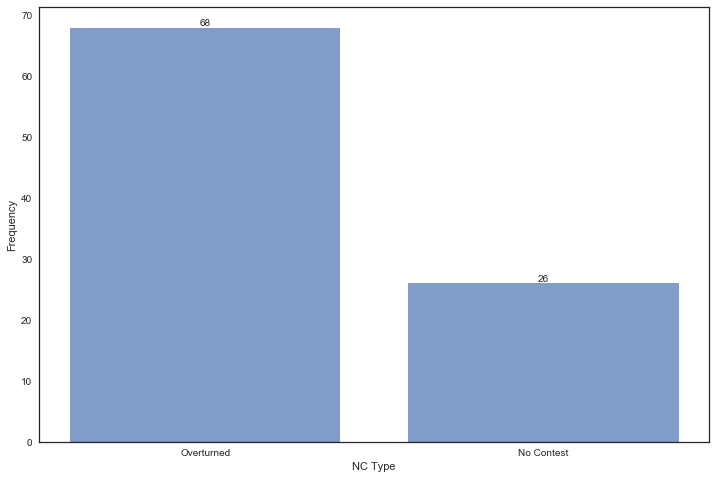

In [33]:
counts = fight_df[fight_df['win/loss']=='NC'].method.value_counts()
plt.figure(figsize=(12,8))
plt.bar(range(len(counts.index)), counts.values, alpha=.7)
plt.xlabel('NC Type')
plt.ylabel('Frequency')
plt.xticks(range(len(counts.index)), counts.index)
for x,y in zip(range(len(counts.index)), counts.values):
    plt.text(x, y, y, ha='center', va='bottom')
plt.show()

### Clean Wins

Let's restrict our view to wins that result from one of the following: 
1. Judge's Decision
2. KO/TKO
3. Submission
4. Injury

These are situations where one fighter was able to prove their dominance over another through their fighting skill. The remaining categories are at best the result of random chance and not relevant to our interests:

1. Overturned
2. No Contest ['method']
3. DQ
4. Draw
5. NC ['win/loss']

If we want to build a classifier that distinguishes between winners and losers, we should look at fights based on factors that are within their control.

In [34]:
fight_df = fight_df[(fight_df['win/loss'] == 'W') | (fight_df['win/loss'] == 'L')]
fight_df = fight_df[(fight_df.method != 'Overturned') & (fight_df.method != 'No Contest') & (fight_df.method != 'DQ')]
fight_df.method.value_counts()

Decision      3680
KO/TKO        2790
Submission    1850
Injury         130
Name: method, dtype: int64

## Heatmap

Let's start off with a bird's eye view of the data. We'll use a heatmap to spot correlations and make quick inferences about the dataset before diving into the individual variables.

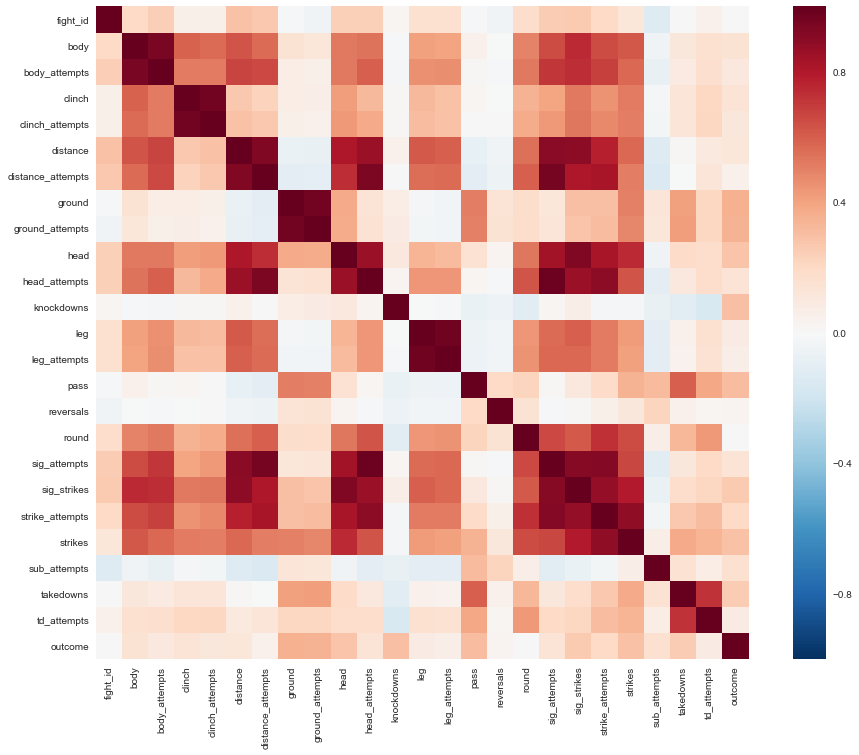

In [22]:
corrmat = fight_df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corrmat, square=True)
plt.show()

Wow, there appears to be a strong corrleation between every strike and strike attempt. Wayne Gretsky was right, "You miss 100% of the shots you don't take." There are several other related variables scattered throughout the dataset. It seems significant attempts, head attempts and distance attempts are all closely related. Also of note is the relationship between the number of passes and the number of takedowns. Interestingly, the number of knowckdowns does not seem to be strongly correlated with any particular variable. There is a small connection between knockdowns, win/loss and head strikes.

There does not appear to be a lot of negative correlations. The only small standouts are sub attempts to fight_id, knockdowns to takedown attempts and sub attempts to distance strikes. The last two make sense to a certain extent. If a a fighter is a good striker, they'd have little reason to try to take someone their opponent down and if they're they're a submission artist they would probably throw fewer distance strikes. The relationship between sub attempts and fight_id doesn't make as much sense to me right now. In the beginning, not many people were familiar with bjj so I would expect the number of submission attempts to grow over time. I'll have to take a closer look at that later.

Applying a log transform yields...

In [23]:
cols = [u'body', u'body_attempts', u'clinch', u'clinch_attempts', u'distance',
       u'distance_attempts', u'ground', u'ground_attempts',
       u'head', u'head_attempts', u'knockdowns', u'leg', u'leg_attempts',
       u'pass', u'reversals', u'sig_attempts', u'sig_strikes',
       u'strike_attempts', u'strikes', u'sub_attempts', u'takedowns',
       u'td_attempts']

fight_logs = fight_df.copy()
fight_logs.loc[:, cols] = fight_df[cols] + 1
fight_logs.loc[:, cols] = fight_logs[cols].apply(np.log)

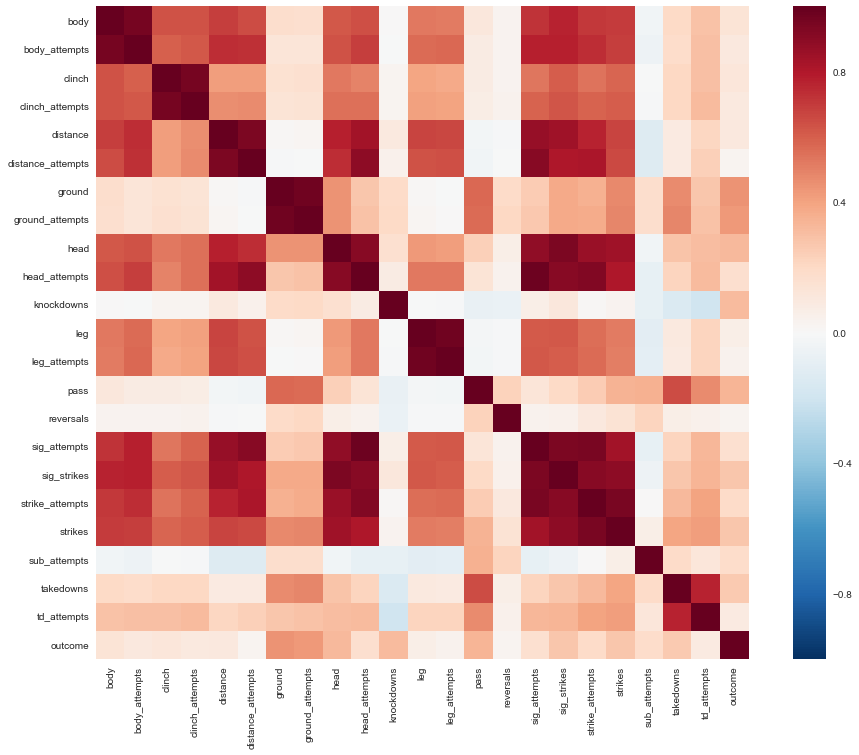

In [24]:
corrmat = fight_logs.drop(['fight_id', 'round'], axis=1).corr()
plt.figure(figsize=(16,12))
sns.heatmap(corrmat, square=True)
plt.show()

## Strike Targets

I want to go through each of these variables to get a sense of each one. We'll use histograms, distribution plots, barplots, violin plots heatmaps, and more to get a better feel for the data.

### Body

First up is body strikes.

In [31]:
fight_df.body.describe()

count    8450.000000
mean        5.954556
std         7.166225
min         0.000000
25%         1.000000
50%         4.000000
75%         9.000000
max        92.000000
Name: body, dtype: float64

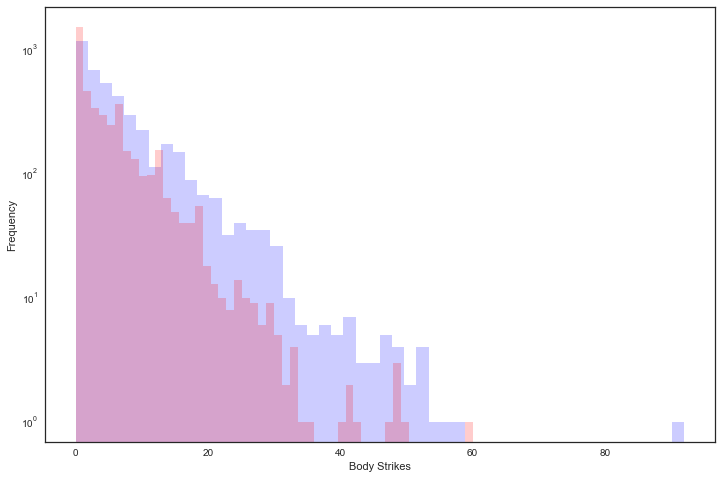

In [32]:
#upper_limit = np.percentile(fight_df['body'].values, 99)
#fight_df.loc[fight_df.body>upper_limit, 'body'] = upper_limit
plt.figure(figsize=(12,8))
plt.hist(
    'body',
    data=fight_df[fight_df['win/loss']=='W'],
    log=True,
    bins=50,
    alpha=.2,
    color='b'
)
plt.hist(
    'body',
    data=fight_df[fight_df['win/loss']=='L'],
    log=True,
    bins=50,
    alpha=.2,
    color='r'
)
plt.xlabel('Body Strikes')
plt.ylabel('Frequency')
plt.show()

It might make sense to plot the number of body strikes vs attempts since they may be correlated. Let's see what the data looks like.

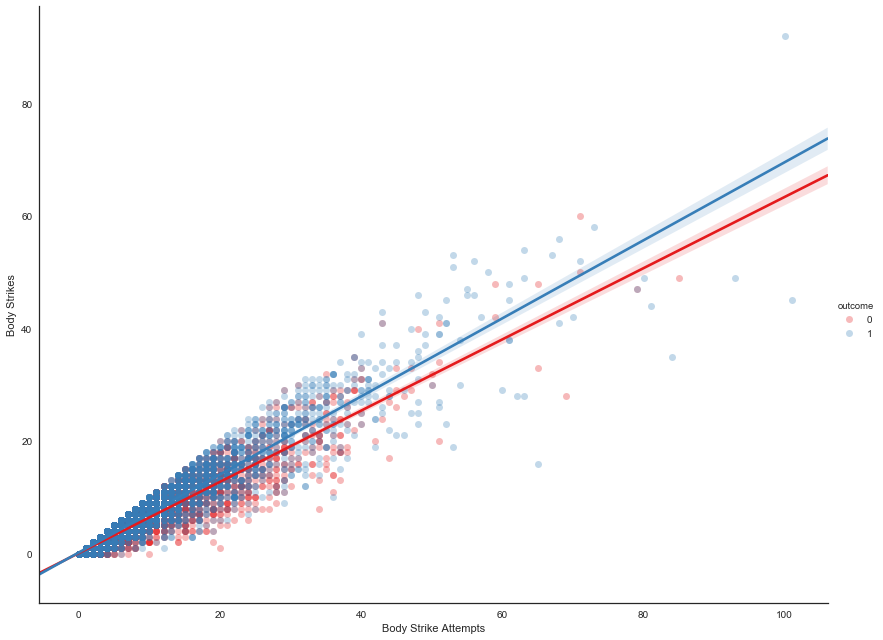

In [35]:
#upper_limit = np.percentile(fight_df['body_attempts'].values, 99)
#fight_df.loc[fight_df.body>upper_limit, 'body_attempts'] = upper_limit
#plt.figure(figsize=(12,8))
sns.lmplot('body_attempts', 'body', 
           data=fight_df, 
           scatter_kws={'alpha':.3},
           hue='outcome',
           palette='Set1',
           size=9, 
           aspect=1.3)
plt.xlabel("Body Strike Attempts")
plt.ylabel("Body Strikes")
plt.show()

Body strikes and body strike attempts are definitely positively correlated. I'm guessing it'll be the same for the other categories.

### Head

In [36]:
fight_df['head'].describe()

count    8450.000000
mean       19.019172
std        18.785579
min         0.000000
25%         5.000000
50%        14.000000
75%        27.000000
max       199.000000
Name: head, dtype: float64

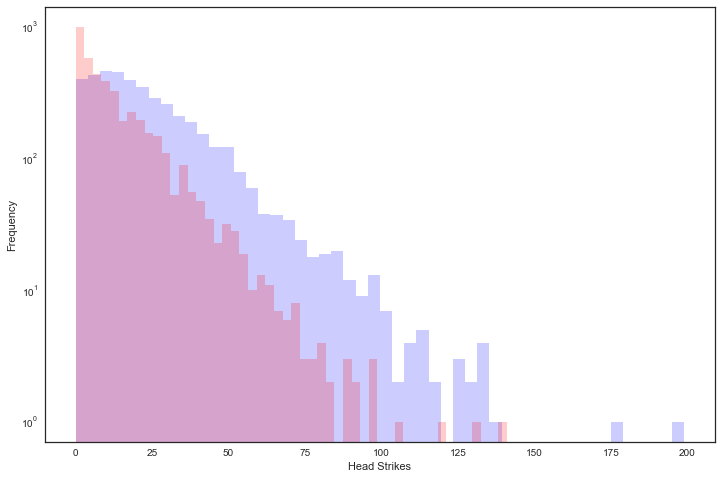

In [37]:
plt.figure(figsize=(12,8))
plt.hist(
    'head',
    data=fight_df[fight_df['win/loss']=='W'],
    log=True,
    bins=50,
    alpha=.2,
    color='b'
)
plt.hist(
    'head',
    data=fight_df[fight_df['win/loss']=='L'],
    log=True,
    bins=50,
    alpha=.2,
    color='r'
)
plt.xlabel('Head Strikes')
plt.ylabel('Frequency')
plt.show()

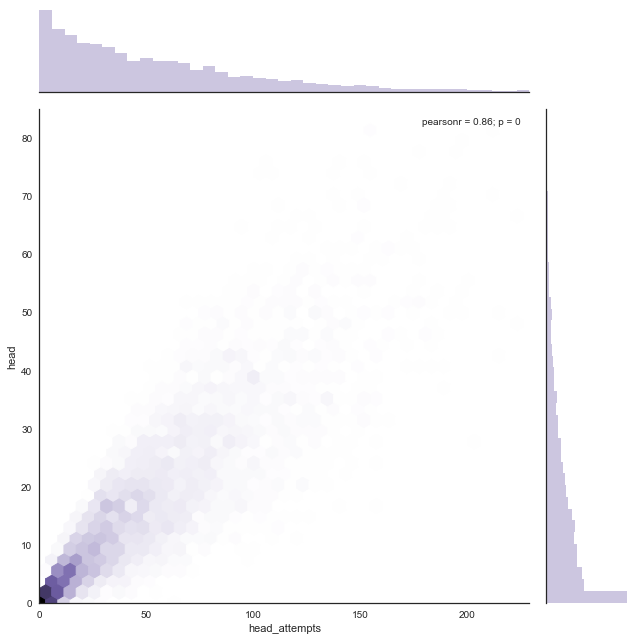

In [38]:
upper_landed = np.percentile(fight_df['head'].values, 99)
#fight_df.loc[fight_df['head']>upper_landed, 'head'] = upper_landed
upper_attempts = np.percentile(fight_df['head_attempts'].values, 99)
#fight_df.loc[fight_df.head_attempts>upper_attempts, 'head_attempts'] = upper_attempts
sns.jointplot(
    'head_attempts', 
    'head', 
    data=fight_df[(fight_df['head']<upper_landed) & (fight_df.head_attempts<upper_attempts)], 
    size=9, 
    kind='hex',
    color=color[3]
)
plt.show()

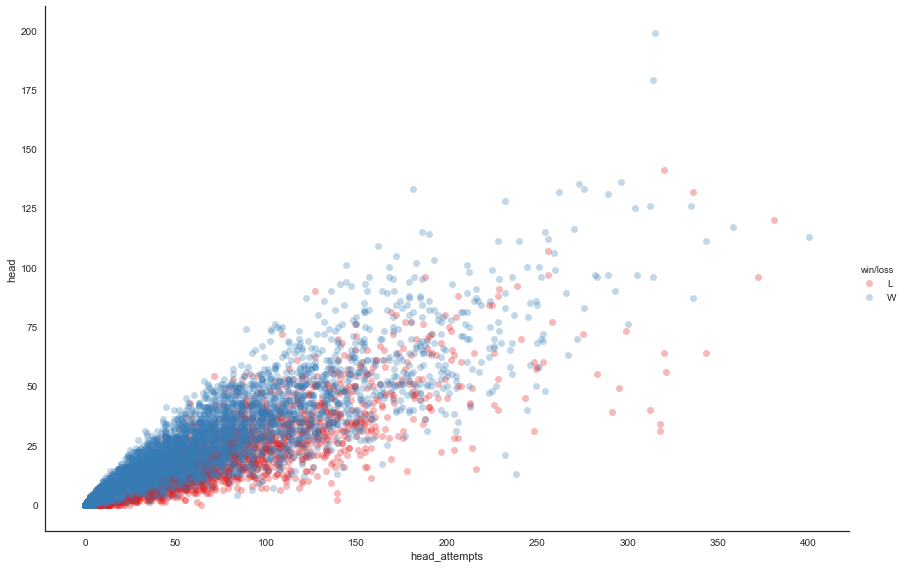

In [39]:
# plt.figure(figsize=(12,8))
sns.lmplot(
    'head_attempts',
    'head',
    data=fight_df,
    hue='win/loss',
    palette='Set1',
    scatter_kws={'alpha':.3},
    fit_reg=False,
    size=8,
    aspect=1.5
)
plt.show()

### Leg

In [40]:
fight_df.leg.describe()

count    8450.000000
mean        4.883787
std         6.802733
min         0.000000
25%         0.000000
50%         2.000000
75%         7.000000
max        75.000000
Name: leg, dtype: float64

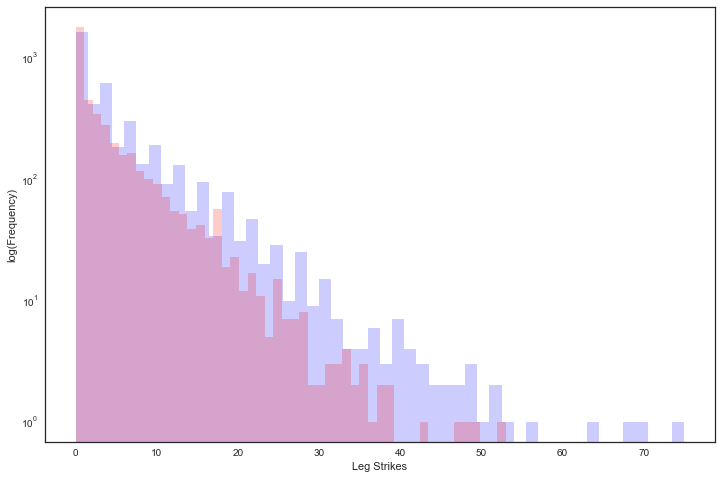

In [41]:
plt.figure(figsize=(12,8))
plt.hist(
    'leg',
    data=fight_df[fight_df['win/loss']=='W'],
    log=True,
    bins=50,
    alpha=.2,
    color='b'
)
plt.hist(
    'leg',
    data=fight_df[fight_df['win/loss']=='L'],
    log=True,
    bins=50,
    alpha=.2,
    color='r'
)
plt.xlabel('Leg Strikes')
plt.ylabel('log(Frequency)')
plt.show()

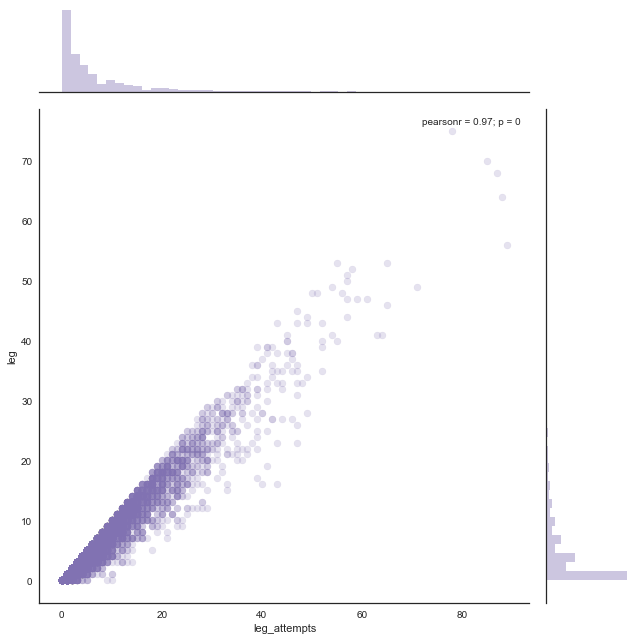

In [42]:
sns.jointplot('leg_attempts', 'leg', data=fight_df, size=9, alpha=.2, color=color[3])
plt.show()

## Strike Types

### Ground and Pound

Let's take a look at the number of ground strikes attempted and landed across the distribution.

In [44]:
fight_df.ground.describe()

count    8450.000000
mean        5.195503
std         9.063701
min         0.000000
25%         0.000000
50%         1.000000
75%         7.000000
max       100.000000
Name: ground, dtype: float64

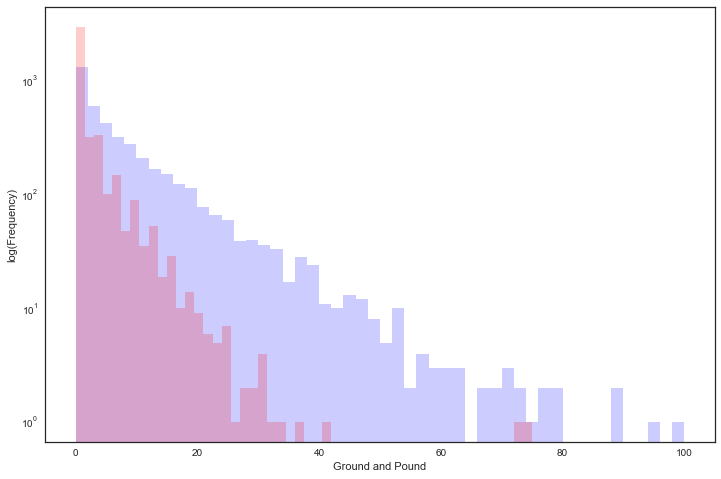

In [45]:
plt.figure(figsize=(12,8))
plt.hist(
    'ground',
    data=fight_df[fight_df['win/loss']=='W'],
    log=True,
    bins=50,
    alpha=.2,
    color='b'
)
plt.hist(
    'ground',
    data=fight_df[fight_df['win/loss']=='L'],
    log=True,
    bins=50,
    alpha=.2,
    color='r'
)
plt.xlabel('Ground and Pound')
plt.ylabel('log(Frequency)')
plt.show()

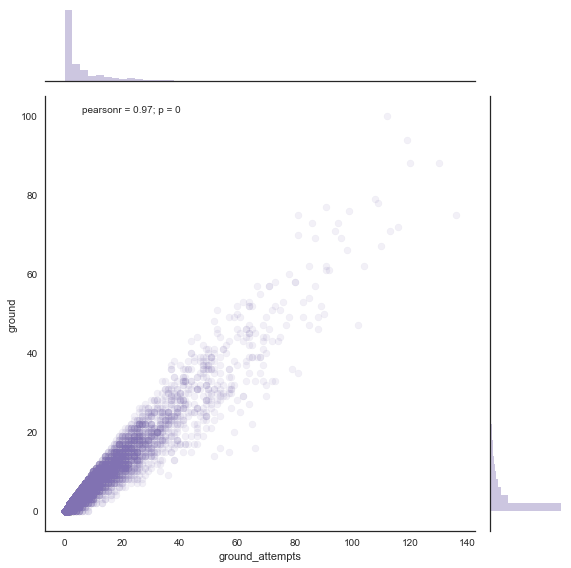

In [46]:
sns.jointplot(
    'ground_attempts',
    'ground',
    data = fight_df,
    size=8, 
    alpha=.1, 
    color=color[3])
plt.show()

### Distance

In [47]:
fight_df.distance.describe()

count    8450.000000
mean       19.490059
std        22.547213
min         0.000000
25%         3.000000
50%        12.000000
75%        27.000000
max       228.000000
Name: distance, dtype: float64

That's quite a range! The mean is 19 but someone landed 228 strikes from distance. I would not want to be on the receiving end of that. Let's take a look at how the distance strikes landed line up with the distance strike attempts.

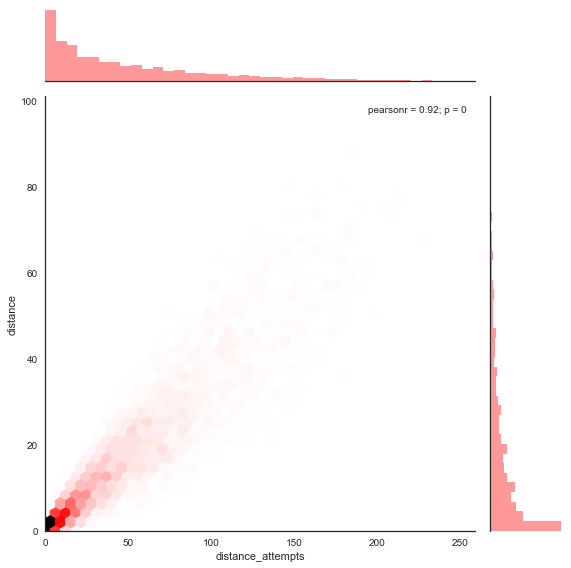

In [48]:
upper_landed = np.percentile(fight_df['distance'].values, 99)
# fight_df.loc[fight_df.distance>upper_landed, 'distance'] = upper_landed
upper_attempts = np.percentile(fight_df['distance_attempts'].values, 99)
# fight_df.loc[fight_df.distance_attempts>upper_attempts, 'distance_attempts'] = upper_attempts
sns.jointplot(
    'distance_attempts', 
    'distance', 
    data=fight_df[(fight_df.distance<upper_landed)&(fight_df.distance_attempts<upper_attempts)], 
    kind='hex', 
    size=8, 
    color='r'
)
plt.show()

### Clinch

In [49]:
fight_df.clinch.describe()

count    8450.000000
mean        5.171953
std         7.518794
min         0.000000
25%         0.000000
50%         2.000000
75%         7.000000
max        95.000000
Name: clinch, dtype: float64

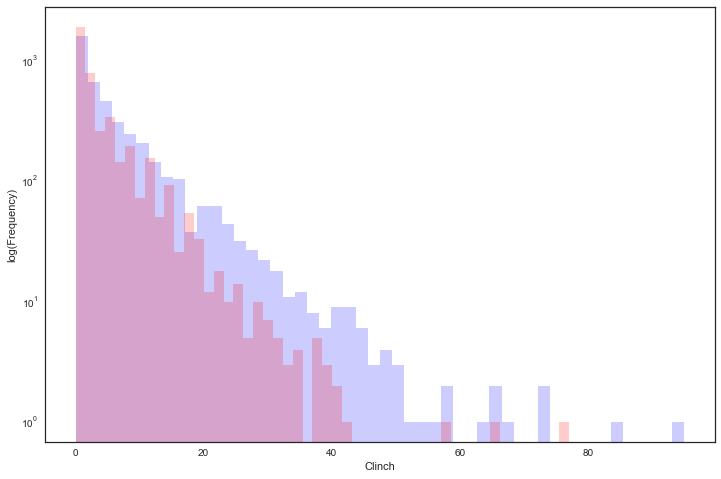

In [51]:
plt.figure(figsize=(12,8))
plt.hist(
    'clinch',
    data=fight_df[fight_df['win/loss']=='W'],
    log=True,
    bins=50,
    alpha=.2,
    color='b'
)
plt.hist(
    'clinch',
    data=fight_df[fight_df['win/loss']=='L'],
    log=True,
    bins=50,
    alpha=.2,
    color='r'
)
plt.xlabel('Clinch')
plt.ylabel('log(Frequency)')
plt.show()

The distribution of successful clinch strikes is highly right-skewed, which makes it a good candidate for a log scale. Plotting clinch attempts vs clinch strikes shows that the data is highly correlated as well. With an r-value of .97, we can see that the number of clinch strikes highly depends on the number of attempts.

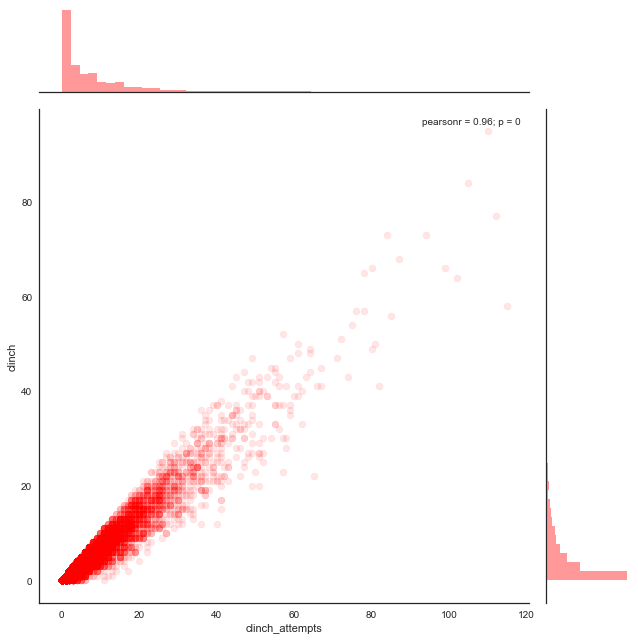

In [52]:
sns.jointplot('clinch_attempts', 'clinch', data=fight_df, alpha=.1, size=9, color='r')
plt.show()

### Significant Strikes

In [53]:
fight_df.sig_strikes.describe()

count    8450.000000
mean       29.857515
std        26.822008
min         0.000000
25%         9.000000
50%        23.000000
75%        43.000000
max       238.000000
Name: sig_strikes, dtype: float64

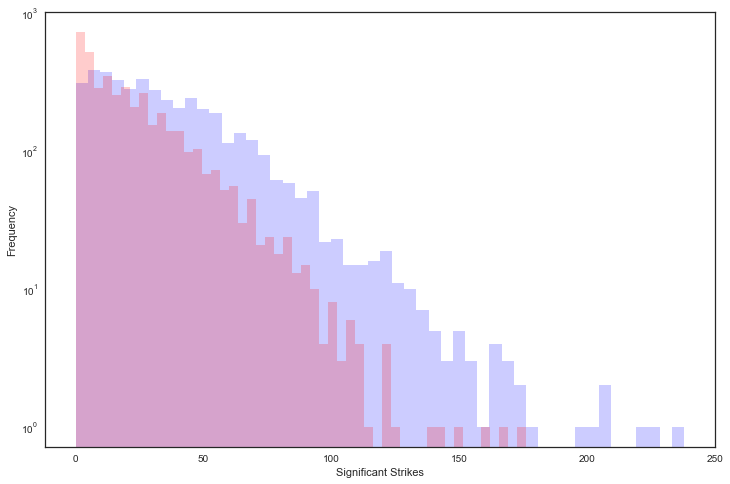

In [55]:
plt.figure(figsize=(12,8))
plt.hist(
    'sig_strikes',
    data=fight_df[fight_df['win/loss']=='W'],
    log=True,
    bins=50,
    alpha=.2,
    color='b'
)
plt.hist(
    'sig_strikes',
    data=fight_df[fight_df['win/loss']=='L'],
    log=True,
    bins=50,
    alpha=.2,
    color='r'
)
plt.xlabel('Significant Strikes')
plt.ylabel('Frequency')
plt.show()

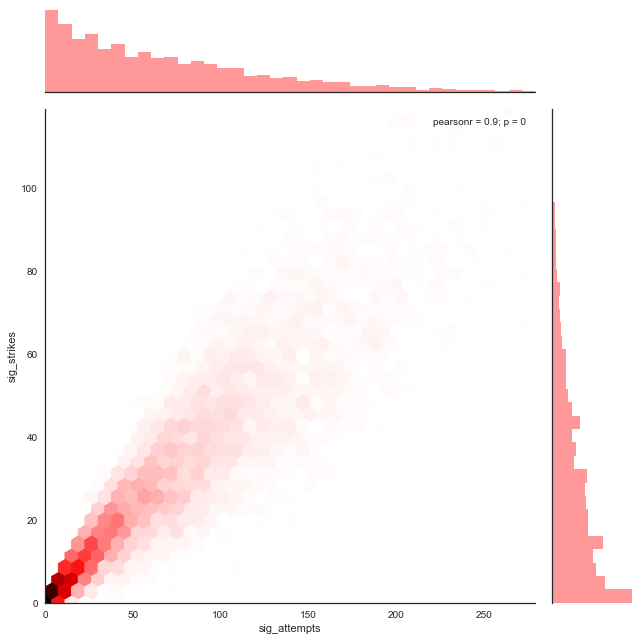

In [56]:
upper_landed = np.percentile(fight_df['sig_strikes'].values, 99)
# fight_df.loc[fight_df['sig_strikes']>upper_landed, 'sig_strikes'] = upper_landed
upper_attempts = np.percentile(fight_df['sig_attempts'].values, 99)
# fight_df.loc[fight_df.sig_attempts>upper_attempts, 'sig_attempts'] = upper_attempts
sns.jointplot(
    'sig_attempts', 
    'sig_strikes', 
    data=fight_df[(fight_df.sig_strikes<upper_landed)&(fight_df.sig_attempts<upper_attempts)], 
    size=9, 
    kind='hex', 
    color='r')
plt.show()

### Overall Strikes

In [57]:
fight_df.strikes.describe()

count    8450.000000
mean       48.601183
std        41.364941
min         0.000000
25%        16.000000
50%        40.000000
75%        70.000000
max       361.000000
Name: strikes, dtype: float64

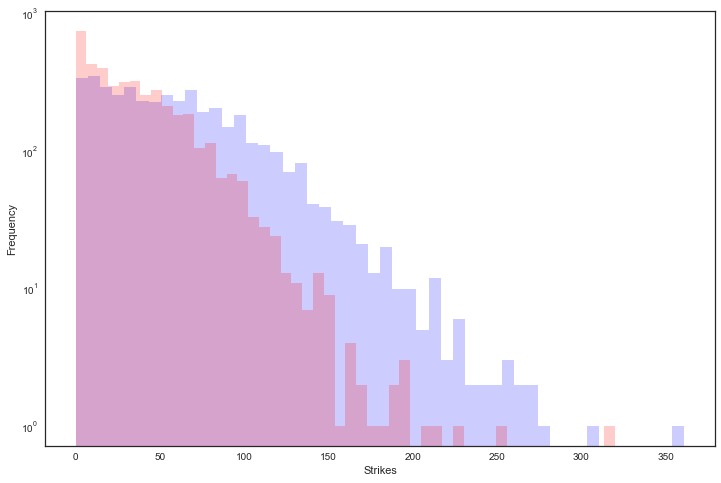

In [58]:
plt.figure(figsize=(12,8))
plt.hist(
    'strikes',
    data=fight_df[fight_df['win/loss']=='W'],
    log=True,
    bins=50,
    alpha=.2,
    color='b'
)
plt.hist(
    'strikes',
    data=fight_df[fight_df['win/loss']=='L'],
    log=True,
    bins=50,
    alpha=.2,
    color='r'
)
plt.xlabel('Strikes')
plt.ylabel('Frequency')
plt.show()

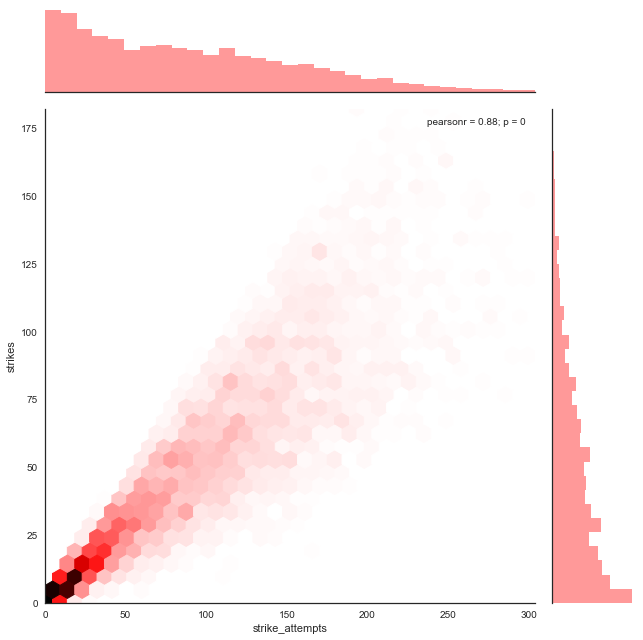

In [59]:
upper_landed = np.percentile(fight_df['strikes'].values, 99)
# fight_df.loc[fight_df['strikes']>upper_landed, 'strikes'] = upper_landed
upper_attempts = np.percentile(fight_df['strike_attempts'].values, 99)
# fight_df.loc[fight_df.strike_attempts>upper_attempts, 'strike_attempts'] = upper_attempts
sns.jointplot(
    'strike_attempts', 
    'strikes', 
    data=fight_df[(fight_df.strikes<upper_landed)&(fight_df.strike_attempts<upper_attempts)], 
    size=9, 
    kind='hex', 
    color='r')
plt.show()

## Grappling

### Submissions

This variable will require a bit of reworking. The submission variable is binary, while the submissions attempted is discrete. That makes sense of course, becaues you can't submit someone more than once in a match by definition (unless you count twitter wars). So for this aspect, let's take at the distribution of submissions attempts vs the method used. My theory is that submission attempts are higher in fights that end that way, but let's take a look at the data!

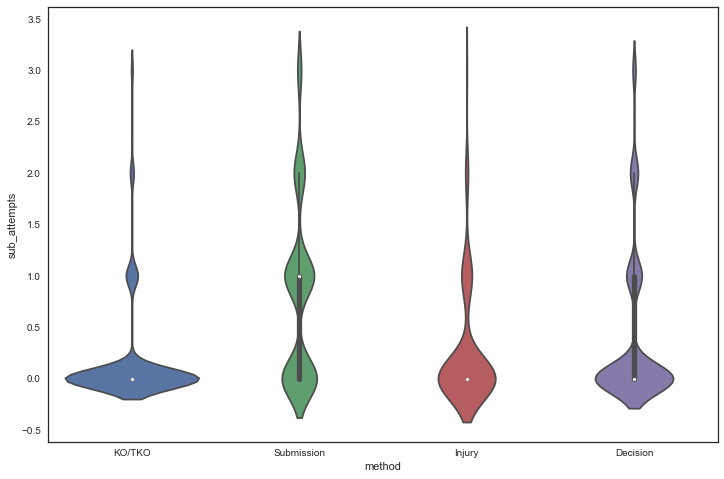

In [60]:
upper_attempts = np.percentile(fight_df.sub_attempts, 99)
plt.figure(figsize=(12,8))
sns.violinplot(
    x="method", 
    y="sub_attempts", 
    data=fight_df[(fight_df.sub_attempts<upper_attempts)])
plt.show()

What an interesting distribution! And just as expected, fights that end in submission have a higher percentage of submisssion attempts greater than zero. Interestingly, fights that end in decision aren't heavy on submission attempts. This could be due to the nature of how fights are scored overall since submission attempts do not give a fighter as many points as strikes.

Another thing that jumped out at me is the number of submission wins with zero submission attempts. I would expect that every fight that ends in submission contained at least one submission attempt, but I'm guessing they count submission due to strikes as well.

### Passes

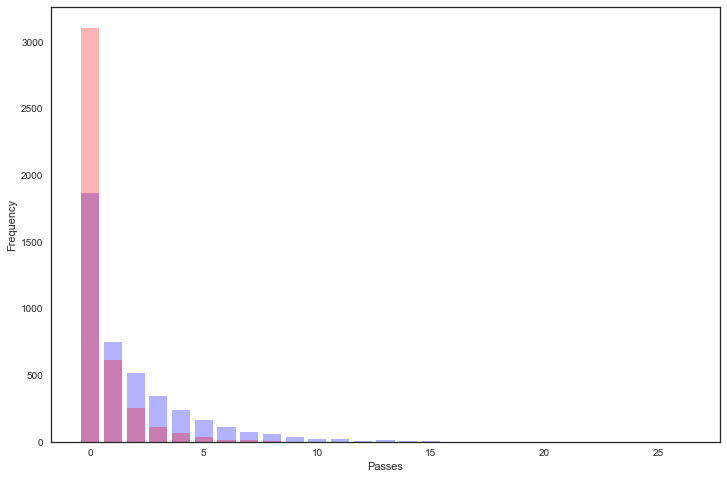

In [61]:
w_counts = fight_df.loc[fight_df['win/loss']=='W','pass'].value_counts()
l_counts = fight_df.loc[fight_df['win/loss']=='L','pass'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(
    w_counts.index,
    w_counts.values,
    alpha=.3,
    color='b'
)
plt.bar(
    l_counts.index,
    l_counts.values,
    alpha=.3,
    color='r'
)
plt.xlabel('Passes')
plt.ylabel('Frequency')
'''
for x,y in zip(counts.index, counts.values):
    plt.text(x, y, y, ha='center', va='bottom')
'''
plt.show()

### Reversals

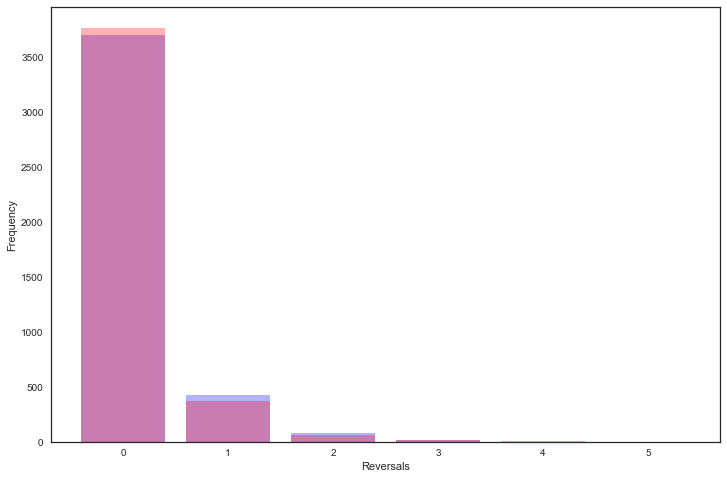

In [62]:
w_counts = fight_df.loc[fight_df['win/loss']=='W','reversals'].value_counts()
l_counts = fight_df.loc[fight_df['win/loss']=='L','reversals'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(
    w_counts.index,
    w_counts.values,
    alpha=.3,
    color='b'
)
plt.bar(
    l_counts.index,
    l_counts.values,
    alpha=.3,
    color='r'
)
plt.xlabel('Reversals')
plt.ylabel('Frequency')
'''
for x,y in zip(counts.index, counts.values):
    plt.text(x, y, y, ha='center', va='bottom')
'''
plt.show()

### Takedowns

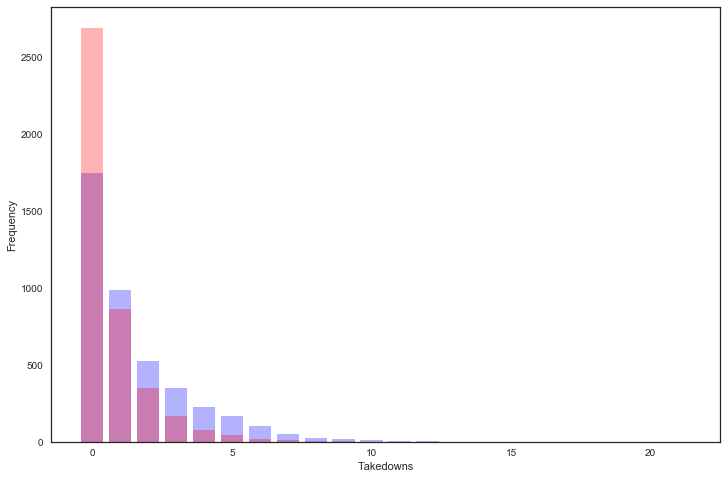

In [63]:
w_counts = fight_df.loc[fight_df['win/loss']=='W','takedowns'].value_counts()
l_counts = fight_df.loc[fight_df['win/loss']=='L','takedowns'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(
    w_counts.index,
    w_counts.values,
    alpha=.3,
    color='b'
)
plt.bar(
    l_counts.index,
    l_counts.values,
    alpha=.3,
    color='r'
)
plt.xlabel('Takedowns')
plt.ylabel('Frequency')
plt.show()

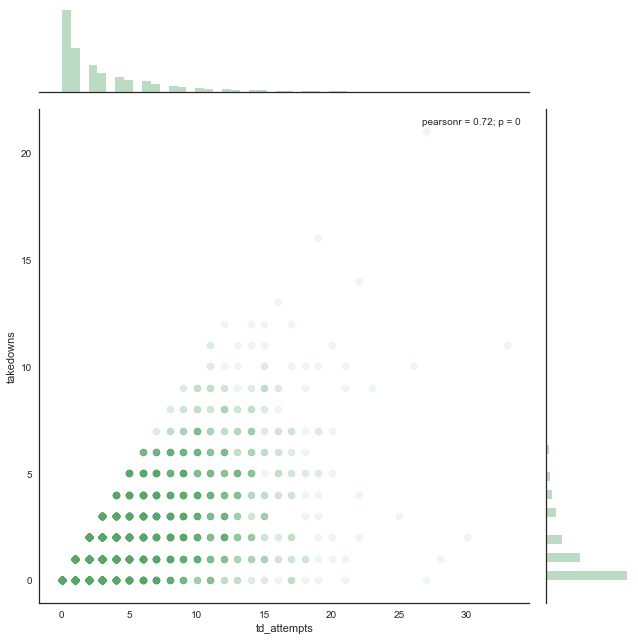

In [64]:
upper_landed = np.percentile(fight_df['takedowns'].values, 99)
upper_attempts = np.percentile(fight_df['td_attempts'].values, 99)
sns.jointplot(
    'td_attempts', 
    'takedowns', 
#     data=fight_df[(fight_df.takedowns<=upper_landed)&(fight_df.td_attempts<=upper_attempts)],
    data=fight_df,
    size=9,
    alpha=.1,
    color=color[1])
#     kind='hex',
#     marginal_kws={'bins':50})
plt.show()

## Knockdowns

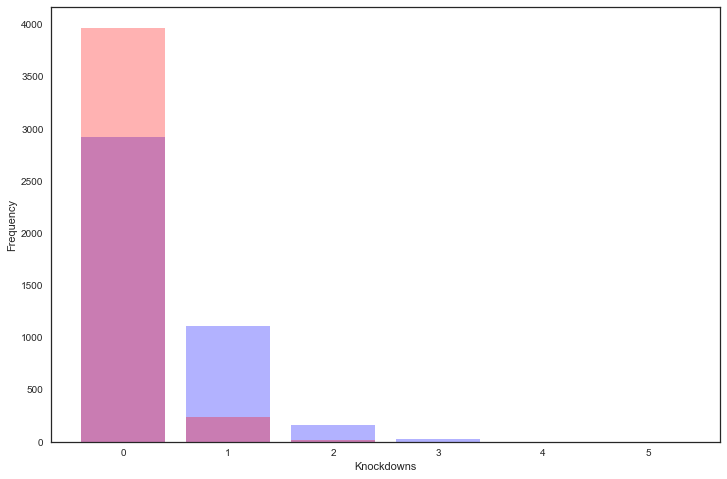

In [66]:
w_counts = fight_df.loc[fight_df['win/loss']=='W','knockdowns'].value_counts()
l_counts = fight_df.loc[fight_df['win/loss']=='L','knockdowns'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(
    w_counts.index,
    w_counts.values,
    alpha=.3,
    color='b'
)
plt.bar(
    l_counts.index,
    l_counts.values,
    alpha=.3,
    color='r'
)
plt.xlabel('Knockdowns')
plt.ylabel('Frequency')
plt.show()

## Referees and Fighters

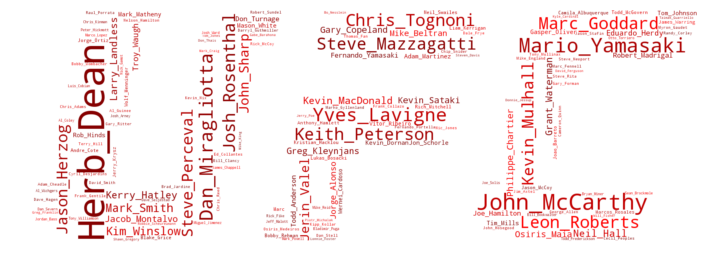

In [67]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%, {}%)".format(random.randint(25, 50))

# Extract referee text from fight_df
text = " ".join("_".join(ref.split()) for ref in fight_df[fight_df.referee.notnull()].referee.tolist())

# read the mask image
ufc_mask = np.array(Image.open("images/UFC_Logo.png"))

wc = WordCloud(background_color="white", mask=ufc_mask, random_state=42)
# generate word cloud
wc.generate(text)

wc.recolor(color_func=grey_color_func, random_state=3)

# store to file
wc.to_file("images/ufc_red_wordcloud.png")

# show
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

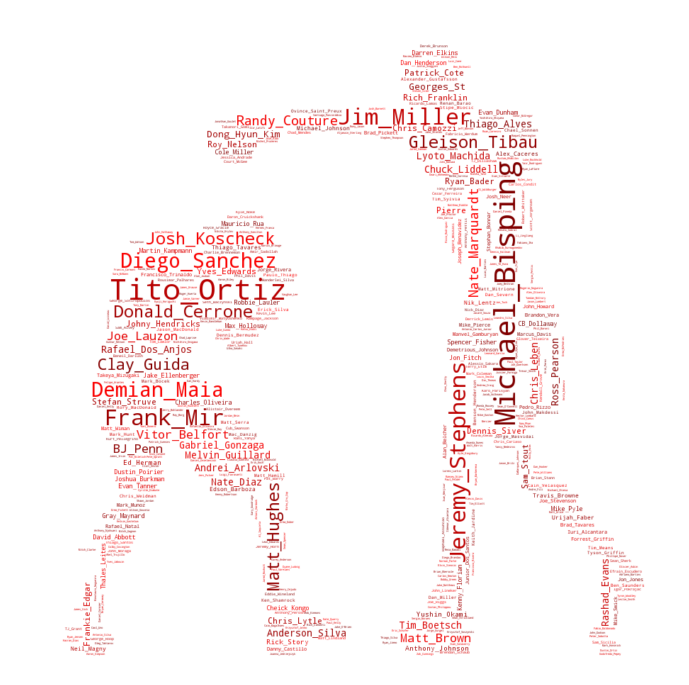

In [68]:
def custom_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%, {}%)".format(random.randint(25, 50))

# Extract referee text from fight_df
text = " ".join("_".join(fighter.split()) for fighter in fight_df[fight_df.name.notnull()].name.tolist())

# read the mask image
fighter_mask = np.array(Image.open("images/shadowboxing.jpg"))


wc = WordCloud(max_words=1000, background_color="white", mask=fighter_mask, random_state=1)
# generate word cloud
wc.generate(text)

wc.recolor(color_func=custom_color_func, random_state=3)

# store to file
wc.to_file("images/ufc_fighter_red_wordcloud.png")

# show
plt.figure(figsize=(14,12))
plt.imshow(wc.recolor(color_func=custom_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.show()

# Multivariate Analysis

Now that we have an overview of the variables involved, let's take a look at some of the interactions.

## Strikes vs Win Percentage

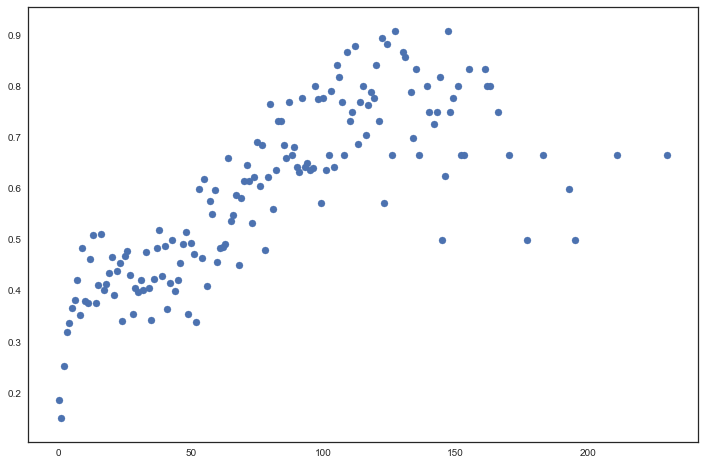

In [38]:
strike_wins = fight_df.loc[fight_df.outcome == 1, 'strikes'].value_counts()
strike_losses = fight_df.loc[fight_df.outcome == 0, 'strikes'].value_counts()
strike_overall = pd.concat([strike_wins, strike_losses], join="inner", axis=1)
strike_overall.columns = ['wins', 'losses']
strike_overall.win_perc = strike_overall.wins / (strike_overall.wins + strike_overall.losses)

plt.figure(figsize = (12,8))
plt.scatter(strike_overall.index, strike_overall.win_perc)
plt.xlabel('Strikes')
plt.ylabel('Win Probability')
plt.show()

# Data Cleaning

The first step in data cleaning is to remove obvious outliers and columns that will not contribute to the model. We've already dropped no contests, DQ's and draws. Let's check other areas. Here's a list of ideas so far:

1. Create accuracy percentages where appropriate
2. Keep a running tally of each fighter's record (wins/losses)

## Logical Errors

Now that the missing values have been taken care of, it might be a good idea to check for any logical errors. Any situations where strikes landed > strikes attempted, takedowns > takedown attempts, etc should be looked at carefully. Let's run a short script to see if any of the above situations are present.

In [71]:
a_cols = [
    u'body_attempts', u'clinch_attempts', u'distance_attempts',
    u'ground_attempts', u'head_attempts', u'leg_attempts', u'sig_attempts',
    u'strike_attempts', u'td_attempts'
]

l_cols = [
    u'body', u'clinch', u'distance', u'ground', u'head', u'leg', u'sig_strikes',
    u'strikes', u'takedowns'
]

for attempts, landed in zip(a_cols, l_cols):
    print attempts
    print fight_df[fight_df[attempts]<fight_df[landed]][[attempts,landed]]

body_attempts
Empty DataFrame
Columns: [body_attempts, body]
Index: []
clinch_attempts
Empty DataFrame
Columns: [clinch_attempts, clinch]
Index: []
distance_attempts
Empty DataFrame
Columns: [distance_attempts, distance]
Index: []
ground_attempts
Empty DataFrame
Columns: [ground_attempts, ground]
Index: []
head_attempts
Empty DataFrame
Columns: [head_attempts, head]
Index: []
leg_attempts
Empty DataFrame
Columns: [leg_attempts, leg]
Index: []
sig_attempts
Empty DataFrame
Columns: [sig_attempts, sig_strikes]
Index: []
strike_attempts
Empty DataFrame
Columns: [strike_attempts, strikes]
Index: []
td_attempts
Empty DataFrame
Columns: [td_attempts, takedowns]
Index: []


Looks good, all output columns are empty as expected.

# Feature Engineering

What is it about each figher that makes him a favorite? This may require a lot or rearranging, so it may be worth it to think this through a bit first. I could reset each fighter's stats and only add stats that came prior to each fight. This would be a more comprehensive way of comparing each fighter and would align more closely to real-world applications. Here's a rough sketch of what the process might look like:

1. Add columns for kicks taken, punches taken, etc?
  1. One disadvantage is that this would mean nearly doubling the number of variables in a dataset that is already massive. This will hurt some machine learning models. Let's omit this for now and come back to it later if necessary.

## Comparing Winners and Losers

Next, I will create a running tally of differences between each fighter in each fight. My hope is that by comparing the winners and losers of each individual fight, I might be able to determine which features, if any can predict success in the UFC.

I will look at both ratios and differences, but I want to start with differences first. Right off the bat, I can see that the ratio strategy will come with its own set of challenges because of the number of values that are equal to zero. It may be possible to add one to all relevant columns to overcome this, but I want to tackle the easier problem first.

The following script sorts the dataframe by id and then by win/loss so that the fight loser is always presented first.

In [22]:
fight_df.sort_values(['fight_id', 'win/loss'], inplace=True)
fight_df.index = range(len(fight_df))
len(fight_df[(fight_df['win/loss']=='W') & (fight_df.index%2==0)])

0

The losing fighters are now presented first, which will make the process of separating winners and losers slightly easier.

### Fighter Differences

In [23]:
cols = [u'body', u'body_attempts', u'clinch', u'clinch_attempts', u'distance',
       u'distance_attempts', u'ground', u'ground_attempts',
       u'head', u'head_attempts', u'knockdowns', u'leg', u'leg_attempts',
       u'pass', u'reversals', u'sig_attempts', u'sig_strikes',
       u'strike_attempts', u'strikes', u'sub_attempts', u'takedowns',
       u'td_attempts']

fighter_a = fight_df[fight_df.index%2==0]
fighter_b = fight_df[fight_df.index%2==1]

fighter_a.reset_index(inplace=True, drop=True)
fighter_b.reset_index(inplace=True, drop=True)

fight_loser_diff = fighter_a.copy()
fight_winner_diff = fighter_b.copy()

fight_loser_ratio = fighter_a.copy()
fight_winner_ratio = fighter_b.copy()

fight_loser_diff.loc[:, cols] = fighter_a[cols] - fighter_b[cols]
fight_winner_diff.loc[:, cols] = fighter_b[cols] - fighter_a[cols]

In [24]:
fight_loser_diff.head()

,name,date,fight_id,win/loss,method,body,body_attempts,clinch,clinch_attempts,distance,distance_attempts,ground,ground_attempts,head,head_attempts,knockdowns,leg,leg_attempts,location,pass,referee,reversals,round,sig_attempts,sig_strikes,strike_attempts,strikes,sub_attempts,takedowns,td_attempts,title,outcome
0,Teila Tuli,1993-11-12,0,L,KO/TKO,0,0,0,0,-1,-2,-2,-2,-3,-4,0,0,0,"Denver, Colorado, USA",0,Joao Barreto,0,1,-4,-3,-4,-3,0,0,1,UFC 1: The Beginning,0
1,Zane Frazier,1993-11-12,1,L,KO/TKO,0,2,6,10,-4,-3,-5,-6,-5,-4,-2,2,3,"Denver, Colorado, USA",0,Joao Barreto,0,1,1,-3,-24,-25,0,0,0,UFC 1: The Beginning,0
2,Art Jimmerson,1993-11-12,2,L,Submission,0,0,0,0,0,-3,0,0,0,-1,0,0,-2,"Denver, Colorado, USA",-2,Joao Barreto,0,1,-3,0,-7,-4,0,-1,-1,UFC 1: The Beginning,0
3,Patrick Smith,1993-11-12,3,L,Submission,1,1,1,1,1,1,1,5,0,3,0,2,3,"Denver, Colorado, USA",0,Joao Barreto,0,1,7,3,16,12,-2,-1,-2,UFC 1: The Beginning,0
4,Kevin Rosier,1993-11-12,4,L,KO/TKO,-1,0,0,0,-5,-5,-6,-9,-7,-12,-1,-3,-2,"Denver, Colorado, USA",0,Joao Barreto,0,1,-14,-11,-14,-11,0,0,0,UFC 1: The Beginning,0


In [25]:
fight_winner_diff.head()

,name,date,fight_id,win/loss,method,body,body_attempts,clinch,clinch_attempts,distance,distance_attempts,ground,ground_attempts,head,head_attempts,knockdowns,leg,leg_attempts,location,pass,referee,reversals,round,sig_attempts,sig_strikes,strike_attempts,strikes,sub_attempts,takedowns,td_attempts,title,outcome
0,Gerard Gordeau,1993-11-12,0,W,KO/TKO,0,0,0,0,1,2,2,2,3,4,0,0,0,"Denver, Colorado, USA",0,Joao Barreto,0,1,4,3,4,3,0,0,-1,UFC 1: The Beginning,1
1,Kevin Rosier,1993-11-12,1,W,KO/TKO,0,-2,-6,-10,4,3,5,6,5,4,2,-2,-3,"Denver, Colorado, USA",0,Joao Barreto,0,1,-1,3,24,25,0,0,0,UFC 1: The Beginning,1
2,Royce Gracie,1993-11-12,2,W,Submission,0,0,0,0,0,3,0,0,0,1,0,0,2,"Denver, Colorado, USA",2,Joao Barreto,0,1,3,0,7,4,0,1,1,UFC 1: The Beginning,1
3,Ken Shamrock,1993-11-12,3,W,Submission,-1,-1,-1,-1,-1,-1,-1,-5,0,-3,0,-2,-3,"Denver, Colorado, USA",0,Joao Barreto,0,1,-7,-3,-16,-12,2,1,2,UFC 1: The Beginning,1
4,Gerard Gordeau,1993-11-12,4,W,KO/TKO,1,0,0,0,5,5,6,9,7,12,1,3,2,"Denver, Colorado, USA",0,Joao Barreto,0,1,14,11,14,11,0,0,0,UFC 1: The Beginning,1


In [26]:
fight_diffs = pd.concat(
    [fight_winner_diff,fight_loser_diff],
    ignore_index=True
    )

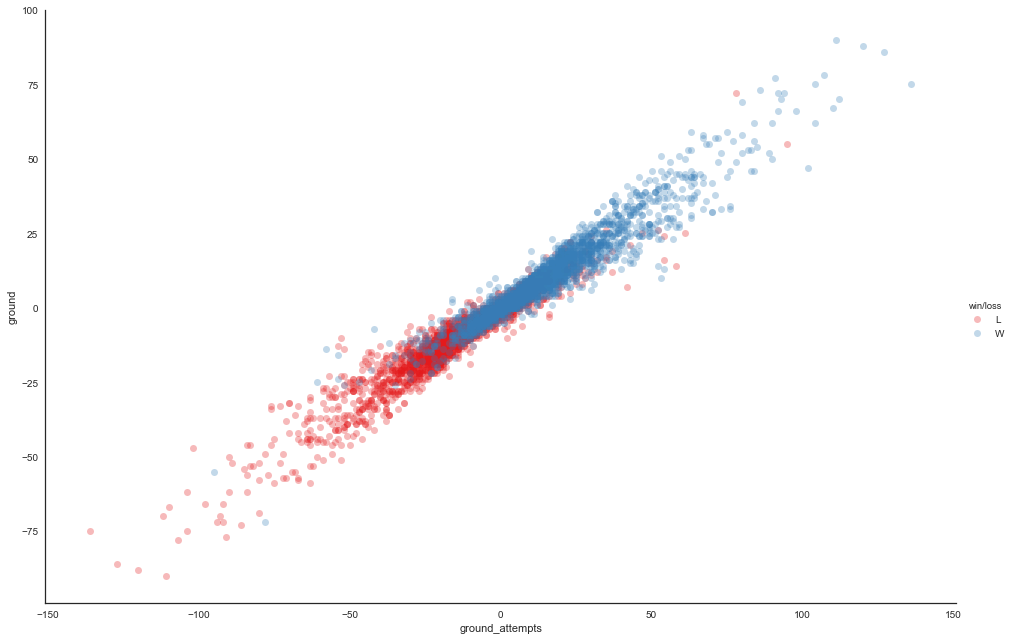

In [27]:
sns.lmplot(
    'ground_attempts',
    'ground',
    data=fight_diffs[::-1],
    hue='win/loss',
    palette='Set1',
    scatter_kws={'alpha':.3},
    fit_reg=False,
    size=9,
    aspect=1.5
)
plt.show()

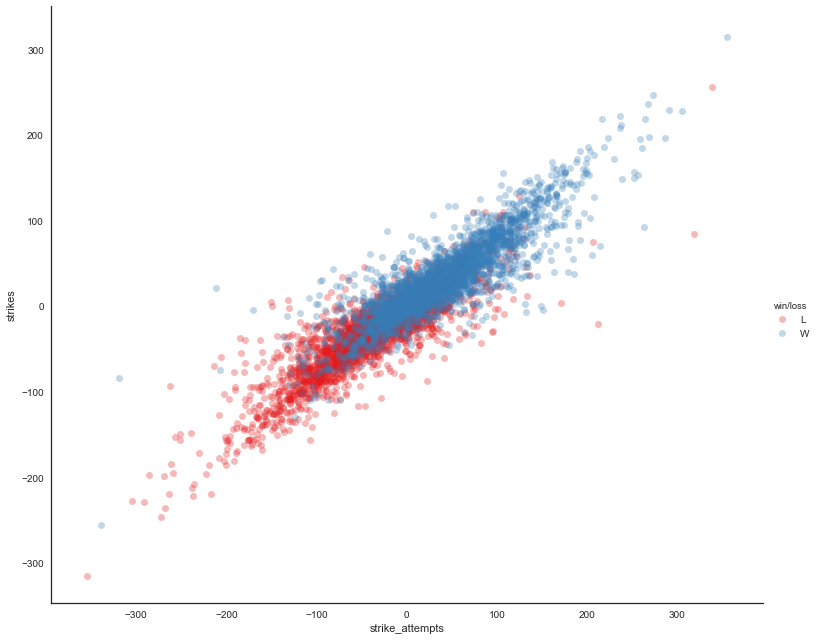

In [28]:
sns.lmplot(
    'strike_attempts',
    'strikes',
    data=fight_diffs[::-1],
    hue='win/loss',
    palette='Set1',
    scatter_kws={'alpha':.3},
    fit_reg=False,
    size=9,
    aspect=1.2
)
plt.show()

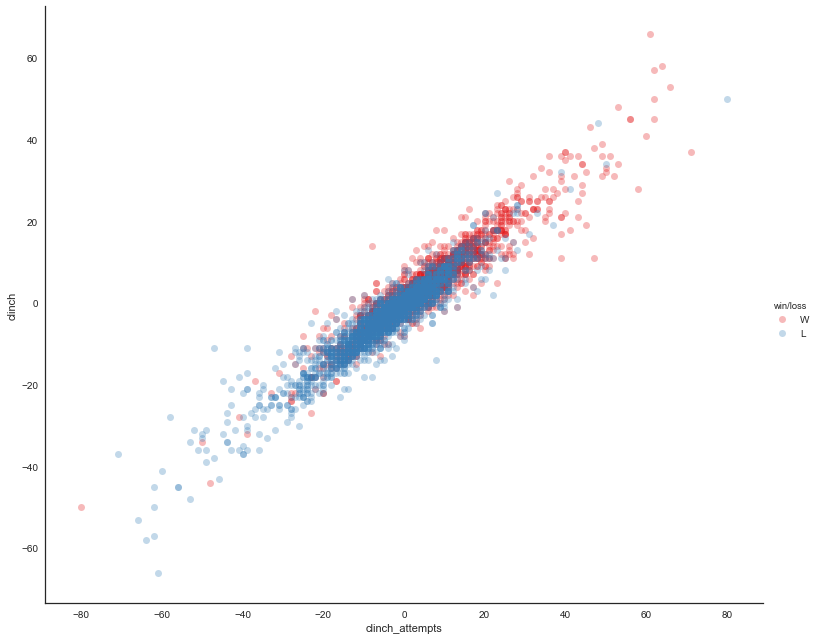

In [29]:
sns.lmplot(
    'clinch_attempts',
    'clinch',
    data=fight_diffs,
    hue='win/loss',
    palette='Set1',
    scatter_kws={'alpha':.3},
    fit_reg=False,
    size=9,
    aspect=1.2
)
plt.show()

### Fighter Log Differences

In [30]:
fighter_a_logs = fighter_a.copy()
fighter_a_logs.loc[:, cols] = fighter_a[cols] + 1
fighter_a_logs.loc[:, cols] = fighter_a_logs[cols].apply(np.log)

fighter_b_logs = fighter_b.copy()
fighter_b_logs.loc[:, cols] = fighter_b[cols] + 1
fighter_b_logs.loc[:, cols] = fighter_b_logs[cols].apply(np.log)


fight_loser_log_diffs = fighter_a_logs.copy()
fight_winner_log_diffs = fighter_b_logs.copy()

fight_loser_log_diffs.loc[:, cols] = fighter_a_logs[cols] - fighter_b_logs[cols]
fight_winner_log_diffs.loc[:, cols] = fighter_b_logs[cols] - fighter_a_logs[cols]


fight_loser_log_diffs.head()

,name,date,fight_id,win/loss,method,body,body_attempts,clinch,clinch_attempts,distance,distance_attempts,ground,ground_attempts,head,head_attempts,knockdowns,leg,leg_attempts,location,pass,referee,reversals,round,sig_attempts,sig_strikes,strike_attempts,strikes,sub_attempts,takedowns,td_attempts,title,outcome
0,Teila Tuli,1993-11-12,0,L,KO/TKO,0.000000,0.000000,0.000000,0.000000,-0.693147,-0.693147,-1.098612,-1.098612,-1.386294,-1.098612,0.000000,0.000000,0.000000,"Denver, Colorado, USA",0.000000,Joao Barreto,0.0,1,-1.098612,-1.386294,-1.098612,-1.386294,0.000000,0.000000,0.693147,UFC 1: The Beginning,0
1,Zane Frazier,1993-11-12,1,L,KO/TKO,0.000000,0.336472,0.788457,0.693147,-1.609438,-0.318454,-0.980829,-1.098612,-0.485508,-0.182322,-1.098612,1.098612,1.386294,"Denver, Colorado, USA",0.000000,Joao Barreto,0.0,1,0.035091,-0.207639,-0.587787,-1.024504,0.000000,0.000000,0.000000,UFC 1: The Beginning,0
2,Art Jimmerson,1993-11-12,2,L,Submission,0.000000,0.000000,0.000000,0.000000,0.000000,-1.386294,0.000000,0.000000,0.000000,-0.693147,0.000000,0.000000,-1.098612,"Denver, Colorado, USA",-1.098612,Joao Barreto,0.0,1,-1.386294,0.000000,-2.079442,-1.609438,0.000000,-0.693147,-0.693147,UFC 1: The Beginning,0
3,Patrick Smith,1993-11-12,3,L,Submission,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.405465,1.252763,0.000000,0.916291,0.000000,1.098612,1.386294,"Denver, Colorado, USA",0.000000,Joao Barreto,0.0,1,1.504077,0.916291,1.435085,1.223775,-1.098612,-0.693147,-1.098612,UFC 1: The Beginning,0
4,Kevin Rosier,1993-11-12,4,L,KO/TKO,-0.693147,0.000000,0.000000,0.000000,-1.791759,-0.810930,-1.945910,-2.302585,-2.079442,-1.945910,-0.693147,-1.386294,-0.693147,"Denver, Colorado, USA",0.000000,Joao Barreto,0.0,1,-1.504077,-2.484907,-1.504077,-2.484907,0.000000,0.000000,0.000000,UFC 1: The Beginning,0


In [31]:
fight_winner_log_diffs.head()

,name,date,fight_id,win/loss,method,body,body_attempts,clinch,clinch_attempts,distance,distance_attempts,ground,ground_attempts,head,head_attempts,knockdowns,leg,leg_attempts,location,pass,referee,reversals,round,sig_attempts,sig_strikes,strike_attempts,strikes,sub_attempts,takedowns,td_attempts,title,outcome
0,Gerard Gordeau,1993-11-12,0,W,KO/TKO,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,1.098612,1.098612,1.386294,1.098612,0.000000,0.000000,0.000000,"Denver, Colorado, USA",0.000000,Joao Barreto,0.0,1,1.098612,1.386294,1.098612,1.386294,0.000000,0.000000,-0.693147,UFC 1: The Beginning,1
1,Kevin Rosier,1993-11-12,1,W,KO/TKO,0.000000,-0.336472,-0.788457,-0.693147,1.609438,0.318454,0.980829,1.098612,0.485508,0.182322,1.098612,-1.098612,-1.386294,"Denver, Colorado, USA",0.000000,Joao Barreto,0.0,1,-0.035091,0.207639,0.587787,1.024504,0.000000,0.000000,0.000000,UFC 1: The Beginning,1
2,Royce Gracie,1993-11-12,2,W,Submission,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,1.098612,"Denver, Colorado, USA",1.098612,Joao Barreto,0.0,1,1.386294,0.000000,2.079442,1.609438,0.000000,0.693147,0.693147,UFC 1: The Beginning,1
3,Ken Shamrock,1993-11-12,3,W,Submission,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.405465,-1.252763,0.000000,-0.916291,0.000000,-1.098612,-1.386294,"Denver, Colorado, USA",0.000000,Joao Barreto,0.0,1,-1.504077,-0.916291,-1.435085,-1.223775,1.098612,0.693147,1.098612,UFC 1: The Beginning,1
4,Gerard Gordeau,1993-11-12,4,W,KO/TKO,0.693147,0.000000,0.000000,0.000000,1.791759,0.810930,1.945910,2.302585,2.079442,1.945910,0.693147,1.386294,0.693147,"Denver, Colorado, USA",0.000000,Joao Barreto,0.0,1,1.504077,2.484907,1.504077,2.484907,0.000000,0.000000,0.000000,UFC 1: The Beginning,1


In [32]:
fight_log_diffs = pd.concat(
    [fight_loser_log_diffs, fight_winner_log_diffs,],
    ignore_index=True
    )

### Fighter Ratios

The results we're getting from the ratios are about the same as that of the differences. We'll put this on the backburner for now, but we may use a similar concept in the future to predict fights that haven't happened yet

In [ ]:
'''
fighter_a.loc[:, cols] += 1
fighter_b.loc[:, cols] += 1

fight_loser_ratio.loc[:, cols] = fighter_a[cols] / fighter_b[cols]
fight_winner_ratio.loc[:, cols] = fighter_b[cols] / fighter_a[cols]
'''

In [ ]:
# fight_winner_ratio.head()

In [ ]:
# fight_loser_ratio.head()

In [ ]:
'''
fight_ratios = pd.concat(
    [fight_winner_ratio,fight_loser_ratio],
    ignore_index=True
    )
'''

### Running Tallies

The next step is to get a running tally of each fighter's stats and compare them to his or her opponent. Let's break this down:

1. How are you going to do this for each row? Will you loop through or use some sort of apply function?
2. You only want to affect certain columns. 


previous_fights = fight_df.iloc[:i, cols] fight_df[fight_df.name=='this_name', cols] = np.mean(previous_fights[prev_fights.name == 'this_name'])

The first step will be to get the sum of all stats up to current divided by the number of fights. I'm thinking a couple for loops.
Op

In [40]:
fight_copy = fight_df.copy()
for i in range(1,len(fight_copy)):
    cur_name = fight_df.loc[i, 'name']
    prev_fights = fight_df.iloc[:i]
    fight_copy.loc[i, cols] = np.mean(prev_fights.loc[prev_fights.name == cur_name, cols])

In [41]:
fight_copy = fight_copy.iloc[1:]
test_copy = fight_copy.copy()

Now that you have a running tally, the next step is to exclude all fights where one of the fighters is making their debut.

In [42]:
for i in test_copy.fight_id.tolist():
    f1 = test_copy[(test_copy.fight_id == i) & (test_copy.outcome == 1)]
    f2 = test_copy[(test_copy.fight_id == i) & (test_copy.outcome == 0)]
    if sum(f1.isnull().any().values) or sum(f2.isnull().any().values):
        test_copy = test_copy[test_copy.fight_id != i]

test_copy
fight_tallies = test_copy.copy()

The next step is to subtract the differences between each fighter, then take the log difference. Fortunately, we have the code for that!

#### Differences

In [43]:
fight_tallies.reset_index(inplace=True, drop=True)

In [44]:
fighter_x = fight_tallies[fight_tallies.index%2==0]
fighter_y = fight_tallies[fight_tallies.index%2==1]

fighter_x.reset_index(inplace=True, drop=True)
fighter_y.reset_index(inplace=True, drop=True)

tally_loser_diff = fighter_x.copy()
tally_winner_diff = fighter_y.copy()

tally_loser_diff.loc[:, cols] = fighter_x[cols] - fighter_y[cols]
tally_winner_diff.loc[:, cols] = fighter_y[cols] - fighter_x[cols]

In [45]:
tally_diffs = pd.concat(
    [tally_loser_diff, tally_winner_diff],
    ignore_index=True
    )

#### Log Differences

In [46]:
fighter_x_logs = fighter_x.copy()
fighter_x_logs.loc[:, cols] = fighter_x[cols] + 1
fighter_x_logs.loc[:, cols] = fighter_x_logs[cols].apply(np.log)

fighter_y_logs = fighter_y.copy()
fighter_y_logs.loc[:, cols] = fighter_y[cols] + 1
fighter_y_logs.loc[:, cols] = fighter_y_logs[cols].apply(np.log)


tally_loser_log_diffs = fighter_x_logs.copy()
tally_winner_log_diffs = fighter_y_logs.copy()

tally_loser_log_diffs.loc[:, cols] = fighter_x_logs[cols] - fighter_y_logs[cols]
tally_winner_log_diffs.loc[:, cols] = fighter_y_logs[cols] - fighter_x_logs[cols]


tally_loser_log_diffs.head()

,name,date,fight_id,win/loss,method,body,body_attempts,clinch,clinch_attempts,distance,distance_attempts,ground,ground_attempts,head,head_attempts,knockdowns,leg,leg_attempts,location,pass,referee,reversals,round,sig_attempts,sig_strikes,strike_attempts,strikes,sub_attempts,takedowns,td_attempts,title,outcome
0,Kevin Rosier,1993-11-12,4,L,KO/TKO,1.386294,1.609438,1.609438,2.302585,0.916291,1.011601,0.980829,1.098612,1.178655,1.386294,1.098612,0.000000,0.000000,"Denver, Colorado, USA",0.000000,Joao Barreto,0.000000,1,1.540445,1.386294,2.197225,2.277267,0.000000,0.000000,0.000000,UFC 1: The Beginning,0
1,Ken Shamrock,1993-11-12,5,L,Submission,0.000000,0.000000,0.000000,0.000000,0.000000,-1.386294,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,-1.098612,"Denver, Colorado, USA",-1.098612,Joao Barreto,0.000000,1,-0.693147,0.693147,-0.470004,0.000000,1.098612,0.000000,0.405465,UFC 1: The Beginning,0
2,Gerard Gordeau,1993-11-12,7,L,Submission,0.405465,0.405465,0.000000,0.000000,1.386294,0.955511,1.609438,1.871802,1.791759,1.897120,0.405465,0.916291,0.223144,"Denver, Colorado, USA",-1.098612,Joao Barreto,-0.405465,1,1.568616,2.079442,0.133531,-0.117783,-0.405465,-0.405465,-0.693147,UFC 1: The Beginning,0
3,Scott Morris,1994-03-11,16,L,KO/TKO,-0.693147,-0.693147,0.000000,0.000000,-0.405465,-0.405465,-0.693147,-1.386294,0.287682,-0.405465,0.000000,-0.693147,-0.916291,"Denver, Colorado, USA",0.693147,John McCarthy,0.000000,1,-1.011601,-0.559616,-1.343735,-1.152680,0.287682,0.693147,0.287682,UFC 2: No Way Out,0
4,Orlando Wiet,1994-03-11,18,L,KO/TKO,0.693147,0.693147,0.000000,0.000000,0.693147,0.693147,0.470004,0.510826,0.470004,0.693147,0.000000,0.000000,-0.693147,"Denver, Colorado, USA",-1.098612,John McCarthy,0.000000,1,0.619039,0.587787,-0.362905,-0.559616,-0.693147,-0.693147,-0.693147,UFC 2: No Way Out,0


In [47]:
tally_log_diffs = pd.concat(
    [tally_loser_log_diffs, tally_winner_log_diffs,],
    ignore_index=True
    )

# Modeling

We're going to be methodical when building and testing our algorithms. It's easy to run in circles due to the plethora of algorithms and parameters available. Is a decision tree a better choice? Or should we try Random Forest? What about Support Vector Machines? The machines need our support! Rather than going through all these possibilities and forgetting the results, we'll build pipelines and document our process as we go along. By staying organized, it will be easier to tell if we've already tried a solution. It may also serve to highlight the desired path a bit (one can only hope).

Here's a list of models we have so far. We may add to this list, but it's a good starting place.

1. Perceptron
2. Random Forests
3. Decision Trees Classifier
4. SGD Classifier
5. Linear SVC
6. Gaussian NB
7. KNN

Of course, machine learning isn't just about finding that perfect algorithm. The results depend heavily on earlier steps in the process. One might even say that most of the accuracy depends on the exploratory analysis and feature engineering. That's why so much time was spent in that phase.

Now that we have a few algorithms to explore, we'll pay close attention to each one's hyperparameters. If the data is unbalanced, we'll need to account for that and if it's overfitting / underfitting, we may have to make a different set of changes. There's a lot to absorb here. Let's take our time and keep in mind that data analysis is not a linear process. Sometimes we have to go back and forth between modeling, wrangling, exploring and feature engineering. We can't be afraid to get our hands dirty!

## Extracting Features and Labels

### Numerical Differences

In [33]:
numerical_diffs = fight_diffs.select_dtypes(include=[np.int64])
numerical_diffs = numerical_diffs.drop(['fight_id', 'round'], axis=1)

In [34]:
numerical_diffs.head()

,body,body_attempts,clinch,clinch_attempts,distance,distance_attempts,ground,ground_attempts,head,head_attempts,knockdowns,leg,leg_attempts,pass,reversals,sig_attempts,sig_strikes,strike_attempts,strikes,sub_attempts,takedowns,td_attempts,outcome
0,0,0,0,0,1,2,2,2,3,4,0,0,0,0,0,4,3,4,3,0,0,-1,1
1,0,-2,-6,-10,4,3,5,6,5,4,2,-2,-3,0,0,-1,3,24,25,0,0,0,1
2,0,0,0,0,0,3,0,0,0,1,0,0,2,2,0,3,0,7,4,0,1,1,1
3,-1,-1,-1,-1,-1,-1,-1,-5,0,-3,0,-2,-3,0,0,-7,-3,-16,-12,2,1,2,1
4,1,0,0,0,5,5,6,9,7,12,1,3,2,0,0,14,11,14,11,0,0,0,1


### Log Differences

In [35]:
numerical_log_diffs = fight_log_diffs.select_dtypes(include=[np.int64, np.float])
numerical_log_diffs = numerical_log_diffs.drop(['fight_id', 'round'], axis=1)

In [36]:
numerical_log_diffs.head()

,body,body_attempts,clinch,clinch_attempts,distance,distance_attempts,ground,ground_attempts,head,head_attempts,knockdowns,leg,leg_attempts,pass,reversals,sig_attempts,sig_strikes,strike_attempts,strikes,sub_attempts,takedowns,td_attempts,outcome
0,0.000000,0.000000,0.000000,0.000000,-0.693147,-0.693147,-1.098612,-1.098612,-1.386294,-1.098612,0.000000,0.000000,0.000000,0.000000,0.0,-1.098612,-1.386294,-1.098612,-1.386294,0.000000,0.000000,0.693147,0
1,0.000000,0.336472,0.788457,0.693147,-1.609438,-0.318454,-0.980829,-1.098612,-0.485508,-0.182322,-1.098612,1.098612,1.386294,0.000000,0.0,0.035091,-0.207639,-0.587787,-1.024504,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,-1.386294,0.000000,0.000000,0.000000,-0.693147,0.000000,0.000000,-1.098612,-1.098612,0.0,-1.386294,0.000000,-2.079442,-1.609438,0.000000,-0.693147,-0.693147,0
3,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.405465,1.252763,0.000000,0.916291,0.000000,1.098612,1.386294,0.000000,0.0,1.504077,0.916291,1.435085,1.223775,-1.098612,-0.693147,-1.098612,0
4,-0.693147,0.000000,0.000000,0.000000,-1.791759,-0.810930,-1.945910,-2.302585,-2.079442,-1.945910,-0.693147,-1.386294,-0.693147,0.000000,0.0,-1.504077,-2.484907,-1.504077,-2.484907,0.000000,0.000000,0.000000,0


### Tally Differences

In [48]:
numerical_tally_diffs = tally_diffs.select_dtypes(include=[np.int64, np.float])
numerical_tally_diffs = numerical_tally_diffs.drop(['fight_id', 'round'], axis=1)

### Tally Log Differences

In [49]:
numerical_tally_log_diffs = tally_log_diffs.select_dtypes(include=[np.int64, np.float])
numerical_tally_log_diffs = numerical_tally_log_diffs.drop(['fight_id', 'round'], axis=1)

## Models

In [38]:
# We store the prediction of each model in our dict
# Also included helper functions for each model

def percep(X_train,Y_train,X_test,Y_test,Models):
    perceptron = Perceptron(max_iter = 1000, tol = 0.001, random_state=42)
    perceptron.fit(X_train, Y_train)
    Y_pred = perceptron.predict(X_test)
    Models['Perceptron'] = [
        accuracy_score(Y_test,Y_pred),
        precision_score(Y_test, Y_pred),
        recall_score(Y_test, Y_pred),
        confusion_matrix(Y_test,Y_pred),
    ]
    return

def ranfor(X_train,Y_train,X_test,Y_test,Models):
    randomfor = RandomForestClassifier(max_features="sqrt",
                                       n_estimators = 700,
                                       max_depth = None,
                                       n_jobs=-1,
                                       random_state=42
                                      )
    randomfor.fit(X_train,Y_train)
    Y_pred = randomfor.predict(X_test)
    Models['Random Forests'] = [
        accuracy_score(Y_test,Y_pred),
        precision_score(Y_test, Y_pred),
        recall_score(Y_test, Y_pred),
        confusion_matrix(Y_test,Y_pred),
    ]
    return

def dec_tree(X_train,Y_train,X_test,Y_test,Models):
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_train, Y_train)
    Y_pred = decision_tree.predict(X_test)
    Models['Decision Tree'] = [
        accuracy_score(Y_test,Y_pred),
        precision_score(Y_test, Y_pred),
        recall_score(Y_test, Y_pred),
        confusion_matrix(Y_test,Y_pred),
    ]
    return

def SGDClass(X_train,Y_train,X_test,Y_test,Models):
    sgd = SGDClassifier(max_iter = 1000, tol = 0.001, random_state=42)
    sgd.fit(X_train, Y_train)
    Y_pred = sgd.predict(X_test)
    Models['SGD Classifier'] = [
        accuracy_score(Y_test,Y_pred),
        precision_score(Y_test, Y_pred),
        recall_score(Y_test, Y_pred),
        confusion_matrix(Y_test,Y_pred),
    ]
    return

def linSVC(X_train,Y_train,X_test,Y_test,Models):
    linear_svc = LinearSVC(random_state=42)
    linear_svc.fit(X_train, Y_train)
    Y_pred = linear_svc.predict(X_test)
    Models['SVM'] = [
        accuracy_score(Y_test,Y_pred),
        precision_score(Y_test, Y_pred),
        recall_score(Y_test, Y_pred),
        confusion_matrix(Y_test,Y_pred),
    ]
    return

def bayes(X_train,Y_train,X_test,Y_test,Models):
    gaussian = GaussianNB()
    gaussian.fit(X_train, Y_train)
    Y_pred = gaussian.predict(X_test)
    Models['Bayes'] = [
        accuracy_score(Y_test,Y_pred),
        precision_score(Y_test, Y_pred),
        recall_score(Y_test, Y_pred),
        confusion_matrix(Y_test,Y_pred),
    ]
    return

def Nearest(X_train,Y_train,X_test,Y_test,Models):
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    Models['KNN'] = [
        accuracy_score(Y_test,Y_pred),
        precision_score(Y_test, Y_pred),
        recall_score(Y_test, Y_pred),
        confusion_matrix(Y_test,Y_pred),
    ]

def run_all_and_Plot(df):
    Models = dict()
    from sklearn.model_selection import train_test_split
    #X_all = df.drop(['win/loss'], axis=1)
    #y_all = df['win/loss']
    X_all = df.drop(['outcome'], axis=1)
    y_all = df['outcome']
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
    percep(X_train,Y_train,X_test,Y_test,Models)
    ranfor(X_train,Y_train,X_test,Y_test,Models)
    dec_tree(X_train,Y_train,X_test,Y_test,Models)
    SGDClass(X_train,Y_train,X_test,Y_test,Models)
    linSVC(X_train,Y_train,X_test,Y_test,Models)
    bayes(X_train,Y_train,X_test,Y_test,Models)
    Nearest(X_train,Y_train,X_test,Y_test,Models)
    return Models


def plot_bar(dict, i):
    titles = ['Accuracy', 'Precision', 'Recall']
    labels = tuple(dict.keys())
    y_pos = np.arange(len(labels))
    values = [dict[n][i] for n in dict]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, labels,rotation='vertical')
    plt.ylabel(titles[i])
    plt.title('{} of different models'.format(titles[i]))
    plt.show()


def plot_cm(dict):
    count = 1
    fig = plt.figure(figsize=(10,10))
    for model in dict:
        cm = dict[model][3]
        labels = ['W','L']
        ax = fig.add_subplot(4,4,count)
        cax = ax.matshow(cm)
        plt.title(model,y=-0.8)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        # plt.subplot(2,2,count)
        count+=1
    plt.tight_layout()
    plt.show()

KNN 0.804142011834
SVM 0.826035502959
Decision Tree 0.81775147929
Random Forests 0.872189349112
SGD Classifier 0.866863905325
Bayes 0.830769230769
Perceptron 0.857396449704


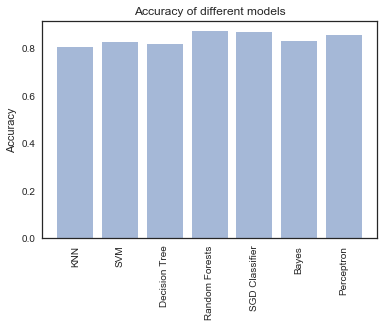

KNN 0.797219003476
SVM 0.828947368421
Decision Tree 0.817535545024
Random Forests 0.870283018868
SGD Classifier 0.862837045721
Bayes 0.836956521739
Perceptron 0.85428907168


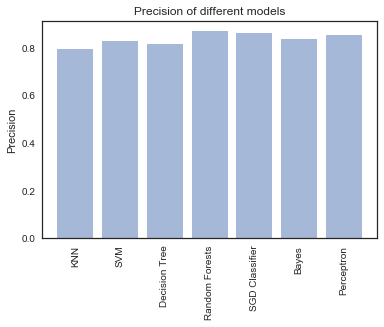

KNN 0.815165876777
SVM 0.821090047393
Decision Tree 0.817535545024
Random Forests 0.874407582938
SGD Classifier 0.872037914692
Bayes 0.821090047393
Perceptron 0.861374407583


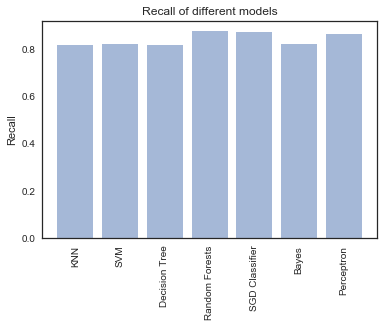

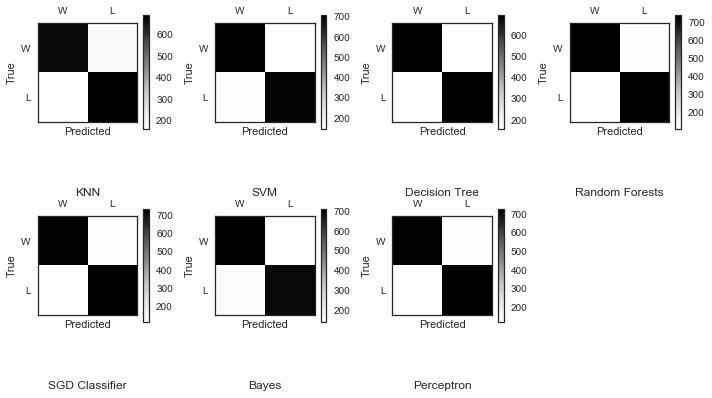

In [39]:
score_metrics = run_all_and_Plot(numerical_diffs)
CompareAll = dict()
CompareAll['Baseline'] = score_metrics

for i in range(3):
    for key,val in score_metrics.items():
        print(str(key) +' '+ str(val[i]))
    plot_bar(score_metrics, i)
    
plot_cm(score_metrics)

KNN 0.814792899408
SVM 0.862130177515
Decision Tree 0.804142011834
Random Forests 0.862130177515
SGD Classifier 0.841420118343
Bayes 0.824852071006
Perceptron 0.776923076923


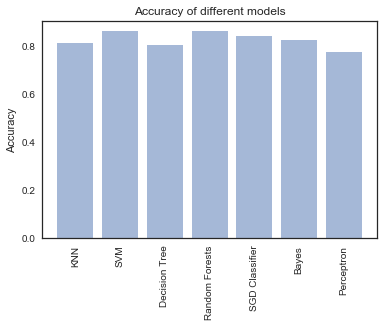

KNN 0.809523809524
SVM 0.858479532164
Decision Tree 0.810615199035
Random Forests 0.861012956419
SGD Classifier 0.840801886792
Bayes 0.820512820513
Perceptron 0.745036572623


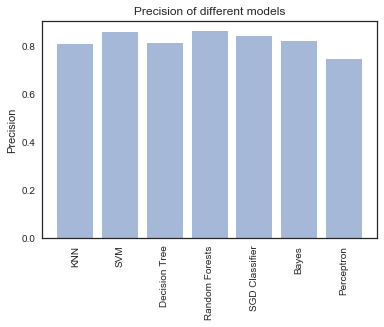

KNN 0.823877068558
SVM 0.867612293144
Decision Tree 0.794326241135
Random Forests 0.864066193853
SGD Classifier 0.842789598109
Bayes 0.832151300236
Perceptron 0.842789598109


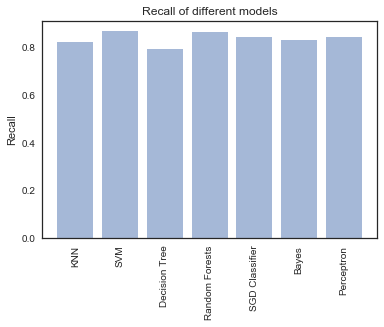

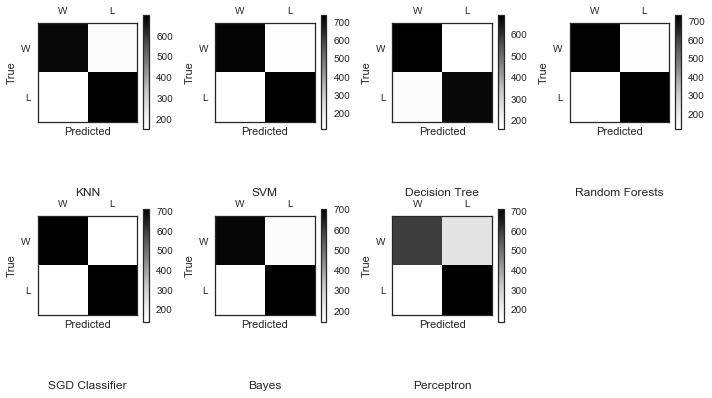

In [54]:
score_metrics = run_all_and_Plot(numerical_log_diffs)
for i in range(3):
    for key,val in score_metrics.items():
        print(str(key) +' '+ str(val[i]))
    plot_bar(score_metrics, i)
plot_cm(score_metrics)

KNN 0.539316239316
SVM 0.524786324786
Decision Tree 0.526495726496
Random Forests 0.526495726496
SGD Classifier 0.464957264957
Bayes 0.565811965812
Perceptron 0.464102564103


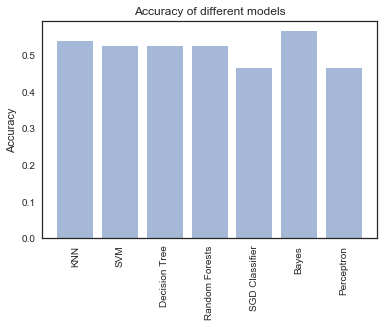

KNN 0.526495726496
SVM 0.51198630137
Decision Tree 0.513698630137
Random Forests 0.513605442177
SGD Classifier 0.453020134228
Bayes 0.55
Perceptron 0.451939291737


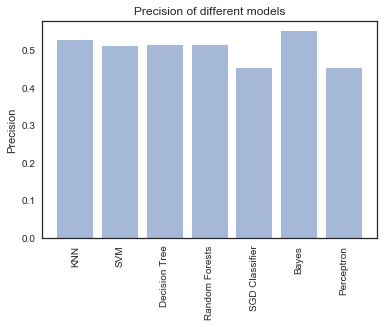

KNN 0.540350877193
SVM 0.524561403509
Decision Tree 0.526315789474
Random Forests 0.529824561404
SGD Classifier 0.473684210526
Bayes 0.598245614035
Perceptron 0.470175438596


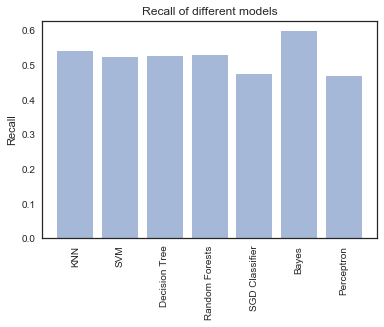

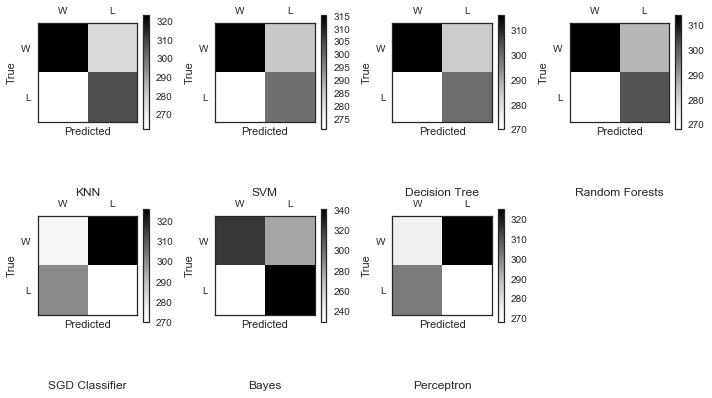

In [55]:
score_metrics = run_all_and_Plot(numerical_tally_diffs)
for i in range(3):
    for key,val in score_metrics.items():
        print(str(key) +' '+ str(val[i]))
    plot_bar(score_metrics, i)
plot_cm(score_metrics)

KNN 0.520512820513
SVM 0.582051282051
Decision Tree 0.512820512821
Random Forests 0.532478632479
SGD Classifier 0.562393162393
Bayes 0.558974358974
Perceptron 0.52735042735


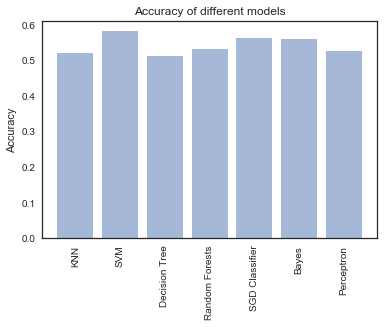

KNN 0.50736497545
SVM 0.568296795953
Decision Tree 0.5
Random Forests 0.519861830743
SGD Classifier 0.551971326165
Bayes 0.546391752577
Perceptron 0.514285714286


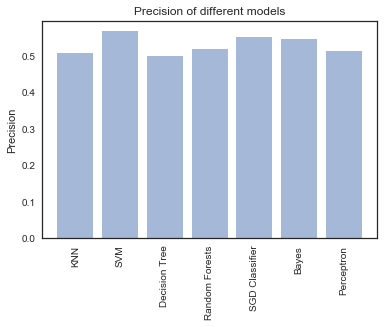

KNN 0.543859649123
SVM 0.591228070175
Decision Tree 0.5
Random Forests 0.528070175439
SGD Classifier 0.540350877193
Bayes 0.557894736842
Perceptron 0.536842105263


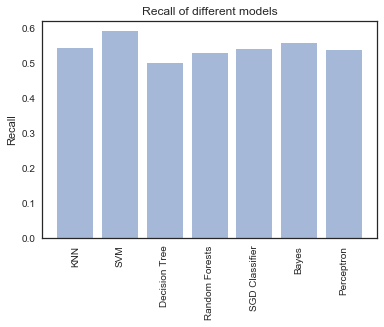

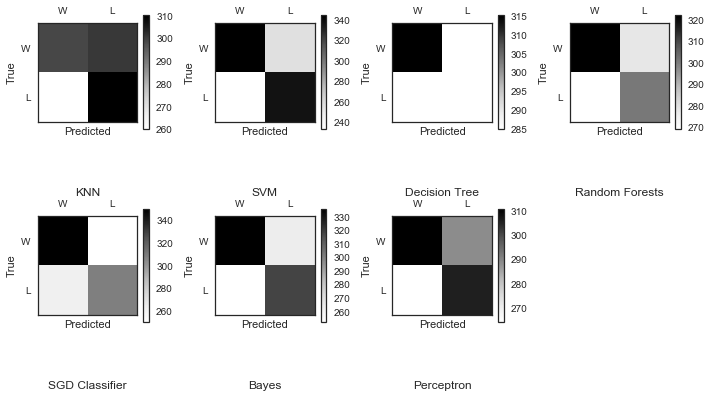

In [56]:
score_metrics = run_all_and_Plot(numerical_tally_log_diffs)
for i in range(3):
    for key,val in score_metrics.items():
        print(str(key) +' '+ str(val[i]))
    plot_bar(score_metrics, i)
plot_cm(score_metrics)

## Predicting UFC 216

It might be fun testing out the classifier on current fight cards. I'll have to do some refactoring, but it'll be a great way to benchmark my progress.

In [283]:
names = [
    "Tony Ferguson", "Kevin Lee", "Demetrious Johnson", "Ray Borg", "Derrick Lewis", 
    "Fabricio Werdum", "Mara Romero Borella", "Kalindra Faria", "Beneil Dariush", 
    "Evan Dunham", "Tom Duquesnoy", "Cody Stamann", "Bobby Green", "Lando Vannata", 
    "Poliana Botelho", "Pearl Gonzalez", "Mark Godbeer", "Walt Harris", 
    "Magomed Bibulatov", "John Moraga", "Thales Leites", "Brad Tavares", 
    "Marco Beltran", "Matt Schnell"
        ]
for name in names:
    print len(tally_log_diffs[tally_log_diffs.name == name])

11
10
13
4
9
11
0
0
10
15
0
0
6
2
0
0
0
5
0
8
15
12
3
1


array([1, 1])

In [139]:
from sklearn.model_selection import train_test_split

x_all = numerical_diffs.drop(['outcome'], axis=1)
y_all = numerical_diffs['outcome']
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=0)

Accuracy Score: 0.878698224852


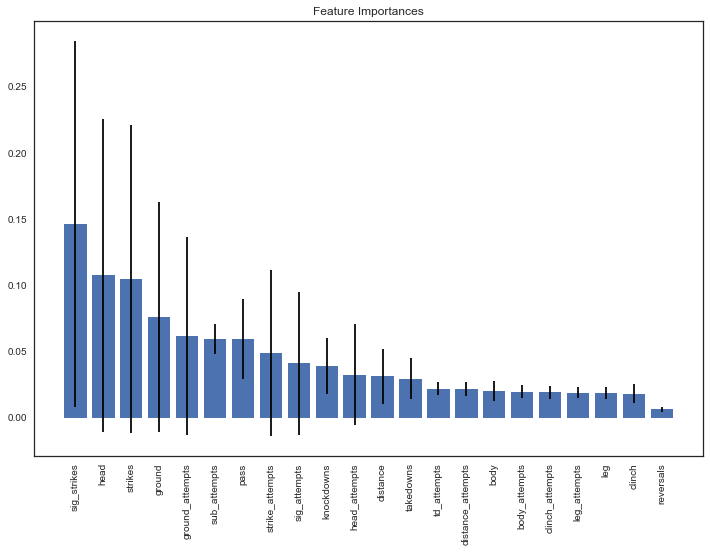

In [140]:
forest = RandomForestClassifier(max_features="sqrt",
                                       n_estimators = 700,
                                       max_depth = None,
                                       n_jobs=-1,
                                       random_state=42
                                      )
forest.fit(x_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
labels = list(numerical_log_diffs.columns)

y_pred = forest.predict(x_test)
print "Accuracy Score:", accuracy_score(y_test,y_pred)

plt.figure(figsize=(12,8))
plt.title("Feature Importances")
plt.bar(
    range(len(numerical_log_diffs.columns)-1),
    importances[indices],
    align="center",
    yerr = std[indices]
)
plt.xticks(
    range(len(numerical_log_diffs.columns)), 
    [labels[i] for i in indices],
    rotation='vertical'
)
plt.show()

In [135]:
from sklearn.model_selection import train_test_split

x_all = numerical_tally_diffs.drop(['outcome'], axis=1)
y_all = numerical_tally_diffs['outcome']
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=0)

Accuracy Score: 0.554700854701


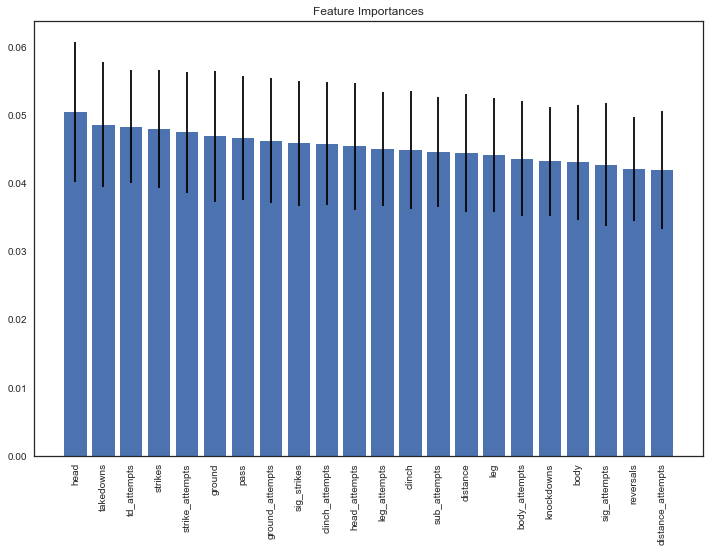

In [136]:
forest = RandomForestClassifier(max_features="sqrt",
                                       n_estimators = 700,
                                       max_depth = None,
                                       n_jobs=-1,
                                       random_state=42
                                      )
forest.fit(x_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
labels = list(numerical_log_diffs.columns)

y_pred = forest.predict(x_test)
print "Accuracy Score:", accuracy_score(y_test,y_pred)

plt.figure(figsize=(12,8))
plt.title("Feature Importances")
plt.bar(
    range(len(numerical_log_diffs.columns)-1),
    importances[indices],
    align="center",
    yerr = std[indices]
)
plt.xticks(
    range(len(numerical_log_diffs.columns)), 
    [labels[i] for i in indices],
    rotation='vertical'
)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
#X_all = dropdata.drop(['winner'], axis=1)
#y_all = dropdata['winner']
#X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=23)
#rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True, max_depth=None) 
#param_grid = { 
#    'n_estimators': [200,700],
#    'max_features': ['auto', 'sqrt', 'log2']
#}

#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train, Y_train)
#print(CV_rfc.best_params_)

## Creating Accuracy Statistics

This block adds accuracy features for each fighter. It creates a ratio of strikes attempted vs strikes landed for each applicable category.

## Reducing Features

This block experiments with a reduced feature set. When building a machine learning model, more features does not necessarily lead to improved accuracy. Having too many features can create noise and mask what is happening. Sometimes, starting with a clean slate and building the model one feature at a time can shed light on what's important and what's unimportant.

# Conclusion


# Stretch Goals

## Get Probability of a Win

Once this first part is done, it would be nice to calculate the probability that a fighter will win his/her next match.

# Scraper Rewrite

The fightmetric scraper reached completion a couple days ago with added functionality. Initially, I scraped the fights in one large chunk, but this had several drawbacks: it took hours to get any results, there was no way to tell whether it was pulling data properly and when it crashed, it resulted in a loss of all data (omg losing all progress after a script has been running for 3 hours is maddening!). The new iteration runs the scraper in chunks in a separate jupyter notebook. Each script processes 200 lines of fight urls and saves the results to separate CSVs. Enabled ```runtools``` in ```nbextensions``` to add the ```run all cells ignore errors``` option. This prevents the whole process from stoping if there's an error in one of the cells. This is a design principal I'm going to hold onto for future large projects because it prevents a lot of headaches.

## Data Enhancement

The following features have been added:

1. Date
2. Location
3. Title
4. Proper Name
5. Proper Win/Loss

## Bugs
1. Data is missing sometimes.
 1. Want to debug to determine why different runs yield different amounts of data
 2. Update: after fixing the name, last few runs have yielded a consistent number of rows (8774).

## Pull requests
1. Details: This holds information on how the fight was finished (punches to head, neck crank, etc)
 1. Code it up if time and run at night



# Todo

1. Graph several variables:
  1. Counts with sns.barplot
  2. Counts with plt.plot
  3. Violin plot of one variable over several categories
  4. sns.distplot of numerical variable
  5. Look at round data
  6. Heatmap
  7. Wordcloud of referee names
  8. Jointplot of two variables
1. Create percentages column for each landed / attempted statistic
2. Aggregate all data so it's ongoing
  1. Sum each fighter's data to make it possible to compare fighters in a reasonable way
  2. One idea is to subtract two fighters' non-ratio stats and use them as labels
  3. You can still use ratio stats as labels
3. Rewrite models to account for the unbalanced data.
  1. Most fights are won by decision, so that should be accounted for
4. Add visuals

# Ideas

1. Classifier for current fight is working. Need to re-think a way to get the prediction algorithm to work as well. Maybe getting more information on the fighters:
 1. Birth year
 2. Training camp
 3. Years training
 4. Background / specialty (boxing, wrestling bjj, etc)
2. Need to re-think how the data is fed into the prediction model. Doing tally differences is not currently working. Need to tweak that idea:
 1. Current trajectory?
 2. Only last few fights?
 3. Average fight statistics against other fighters?
  1. This would take the differences between their stats and opponents' stats in each previous fight and average them